<a href="https://colab.research.google.com/github/Christianah-O/AXIA-FINAL-PROJECT/blob/main/Loan_Default_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AXIA AFRICA COHORT 8 PROJECT

 LOAN DEFAULT RISK PREDICTION

- Note: This project was done entirely on my phone, without a laptop. Because of that, I kept the notebook simple and focused mainly on data preparation, modeling, and evaluation, while leaving most of the visualization for Power BI

**Problem Statement**

Develop a robust machine learning pipeline to predict loan default risk, enabling better credit decision making and helping financial institutions reduce losses.

The data is split into 3 parts:

 **Performance Data (Train Perf)**  
   - Contains loan performance information.  
   - Includes columns such as: customerid, systemloanid, loanamount, totaldue, approveddate, and the target variable, good_bad_flag
   (Good = 1(not default),  Bad = 0(defaulted)).  

**Demographic Data (Train Demographics)**  
   - Provides customer details such as birthdate, employment_status_clients, level_of_education_clients, and bank account type.  

 **Previous Loans Data (Train Previous Loans)**  
   - Contains history of past loans taken by customers, including loanamount, totaldue, termdays, firstduedate, and firstrepaiddate.  
   - This dataset can be used to engineer new features such as number of previous loans, average loan amount, or repayment delays.
  
   **Our Aim**
   - Utilize customer behavioral and financial data to build a predictive model, enhancing accuracy and efficiency in risk assessment



Dataset Sources:

Data 1: https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv

Data 2: https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv

Data 3: https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Data Collection**

In [ ]:
#get datasets
url_1 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv'
url_2 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv'
url_3 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'

In [ ]:
#naming datasets
df_perf = pd.read_csv(url_1)
df_demo = pd.read_csv(url_2)
df_prev = pd.read_csv(url_3)

Performance Dataset

In [ ]:
#preview dataset
df_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


**Data Understanding**

In [ ]:
#check for rows and colums of data
df_perf.shape

(4368, 10)

In [ ]:
#check for missing values and data types
df_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [ ]:
#checking for duplicates
df_perf.duplicated().sum()

np.int64(0)

In [ ]:
#missing values percentage
(df_perf.isna().sum().sort_values(ascending=False)/len(df_perf))*100

,0
referredby,86.561355
customerid,0.000000
systemloanid,0.000000
loannumber,0.000000
creationdate,0.000000
approveddate,0.000000
loanamount,0.000000
totaldue,0.000000
termdays,0.000000
good_bad_flag,0.000000


In [ ]:
df_perf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [ ]:
#checking the unique values of each columns
df_perf.customerid.unique()

array(['8a2a81a74ce8c05d014cfb32a0da1049',
       '8a85886e54beabf90154c0a29ae757c0',
       '8a8588f35438fe12015444567666018e', ...,
       '8a858f365b2547f3015b284597147c94',
       '8a858f935ca09667015ca0ee3bc63f51',
       '8a858fd458639fcc015868eb14b542ad'], dtype=object)

In [ ]:
df_perf.systemloanid.unique()

array([301994762, 301965204, 301966580, ..., 301995576, 301977679,
       301967124])

In [ ]:
df_perf.loanamount.unique()

array([30000., 15000., 20000., 10000., 40000., 25000., 50000., 35000.,
       45000., 60000.])

In [ ]:
df_perf.approveddate.unique()

array(['2017-07-25 08:22:56.000000', '2017-07-05 17:04:41.000000',
       '2017-07-06 14:52:57.000000', ..., '2017-07-25 16:25:57.000000',
       '2017-07-14 13:50:27.000000', '2017-07-06 21:01:06.000000'],
      dtype=object)

In [ ]:
df_perf.totaldue.unique()

array([34500. , 17250. , 22250. , 11500. , 44000. , 39000. , 13000. ,
       28750. , 24500. , 48000. , 11125. , 16687.5, 52500. , 21750. ,
       12250. , 18375. , 11000. , 57500. , 15750. , 33000. , 21500. ,
       55000. , 10750. , 23000. , 12500. , 27500. , 38500. , 10000. ,
       49500. , 22000. , 21000. , 24000. , 10500. , 36000. , 42000. ,
       16125. , 10250. , 38500.2, 68100. , 62700. , 16500. , 43500. ,
       65400. , 33999.9, 20500. , 57000.5, 31500. ])

In [ ]:
df_perf.termdays.unique()

array([30, 15, 60, 90])

In [ ]:
df_perf.referredby.unique()

array([nan, '8a858ef458d4a52e0158d858eb5d6456',
       '8a858ff85bd93919015bda56605652bd',
       '8a858e495d1e235c015d30d5ddb42149',
       '8a858edc59ee87640159eeb9774f1aa7',
       '8a858fc55b2548dd015b286e452c678c',
       '8a858e6c5c88d145015c89430ef61a5d',
       '8a858eba5c884d2a015c8bea59385157',
       '8a858f9d5668e3f10156767e9a0f0188',
       '8a858f645cac1a7e015cac2a1a5911f4',
       '8a858fad5bf85d5e015bf8efc79e33dd',
       '8a858e725c3ae262015c45243caa4f4d',
       '8a858eda5c8863ff015c8b96e5fd74d0',
       '8a858ed75732b681015744c9dee21aae',
       '8a858e135c7e2eec015c813211a96674',
       '8a858ff25c8250c1015c82907bc62b42',
       '8a858e3a5bed83ab015bedad8d191c74',
       '8a858eb65b19b654015b19d9d5aa1ba1',
       '8a8588dc536a141301538365df9251b8',
       '8a858f615b1ffb14015b2316f57f3839',
       '8a858fba5cd5feee015cdf5025e10f56',
       '8a858e185b4923b4015b536354895cae',
       '8a858fd85b685607015b7ba5638674c0',
       '8a858e645755e62201575e72c8b77fd5',
      

In [ ]:
df_perf.creationdate.unique()

array(['2017-07-25 07:22:47.000000', '2017-07-05 16:04:18.000000',
       '2017-07-06 13:52:51.000000', ..., '2017-07-25 15:24:47.000000',
       '2017-07-14 12:50:21.000000', '2017-07-06 20:01:01.000000'],
      dtype=object)

In [ ]:
df_perf.good_bad_flag.unique()

array(['Good', 'Bad'], dtype=object)

Observation:
- dataset has missing values in referredby column
- customerid and systemloanid are both object types with number of different unique values, mergingg both dataset will be better for analysis
- referredby- The column contains many missing values (NaN) and a large number of unique customer IDs. It should be dropped from the dataset because it is not useful for my model prediction due to high missing values greater than 70%
- good_bad_flag- The target column, with two unique values: 'Good' and 'Bad'is clean and ready for model. No cleaning is needed.
- Date Columns (approveddate, creationdate)- they are in object datatypes. To do any time-based analysis or feature engineering, columns need to be converted to a datetime format.
- no duplicates

**Data Cleaning and Feature Engineering**
- The primary reason for cleaning my data is to improve the quality of your dataset.
- It is necessary because a model trained on messy data will produce unreliable results.
- model built on dataset with missing values, duplicates, different unique values of features without cleaning will create noise and make data biasness to be much, to avoid this, cleaning data will help prevent this earlier.
- Feature engineering helps to think critically about the problem being solved, gain insight about data and create new features that can help model learn through the patterns in the new features as well to improve model performance


In [ ]:
#convert date columns to datatime
df_perf['approveddate'] = pd.to_datetime(df_perf['approveddate'])
df_perf['creationdate'] = pd.to_datetime(df_perf['creationdate'])

In [ ]:
#drop referredby
df_perf.drop(columns='referredby', inplace=True)

In [ ]:
#make an approval time column as a new feature
df_perf['approval_time'] = (df_perf['approveddate'] - df_perf['creationdate']).dt.total_seconds()/3600

In [ ]:
#create an interest rate column
df_perf['interest'] = df_perf['totaldue'] - df_perf['loanamount']
#to calculate interest rate
#Interest Rate (%) = (Total Interest Paid / (Principal Amount x Loan Term)) x 100.
df_perf['interest_rate'] = (df_perf['interest'] / (df_perf['loanamount'] * df_perf['termdays'])) * 100

In [ ]:
#dropping interest column since interest rate is more essential to model prediction
df_perf.drop('interest', axis=1, inplace=True)

In [ ]:
#creation day column
df_perf['creation_day_ofloan'] = df_perf['creationdate'].dt.day_name()

In [ ]:
#checking if dataset is cleaned and new features added to it
df_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customerid           4368 non-null   object        
 1   systemloanid         4368 non-null   int64         
 2   loannumber           4368 non-null   int64         
 3   approveddate         4368 non-null   datetime64[ns]
 4   creationdate         4368 non-null   datetime64[ns]
 5   loanamount           4368 non-null   float64       
 6   totaldue             4368 non-null   float64       
 7   termdays             4368 non-null   int64         
 8   good_bad_flag        4368 non-null   object        
 9   approval_time        4368 non-null   float64       
 10  interest_rate        4368 non-null   float64       
 11  creation_day_ofloan  4368 non-null   object        
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 409.6+ KB


In [ ]:
#preview clean dataset
df_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approval_time,interest_rate,creation_day_ofloan
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1.002500,0.500000,Tuesday
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,1.006389,0.500000,Wednesday
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,1.001667,0.750000,Thursday
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,1.001667,1.000000,Thursday
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,1.001667,0.333333,Monday


 cleaning and feature engineering done:
- the approval_time feature was crrated to measure the time it took for each loan to be approved in a numerical format in hours as it can indicate if a loan that took a long time to approve is riskier.
- a high interest rate has been noticed to be associated with higher risk, if it is too expensive to payback, higher chances of default is present.
- creation day of loan was created to show the emergency of the loan applied for, For example, lending patterns or customer behavior might differ on weekends versus weekdays, and this feature will help the model identify such subtle patterns as it was believed that weekdays loans might be more for important things than weekends
- referredby column has been dropped(missing values greater than 70%)
- performance data has been cleaned and new features added

Demographic Dataset

In [ ]:
#preview dataset
df_demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


**Data Understanding**

In [ ]:
#check rows and columns
df_demo.shape

(4346, 9)

In [ ]:
#check data types and missing values
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [ ]:
#duplicates
df_demo.duplicated().sum()

np.int64(12)

In [ ]:
#missing values percentage
df_demo.isna().sum().sort_values(ascending=False)/ len(df_demo) * 100

,0
bank_branch_clients,98.826507
level_of_education_clients,86.493327
employment_status_clients,14.910262
customerid,0.000000
birthdate,0.000000
latitude_gps,0.000000
longitude_gps,0.000000
bank_account_type,0.000000
bank_name_clients,0.000000


In [ ]:
for column in df_demo.columns:
  unique_vals = df_demo[column].unique()
  print(f'unique values of {column} = {unique_vals} \n')

unique values of customerid = ['8a858e135cb22031015cbafc76964ebd' '8a858e275c7ea5ec015c82482d7c3996'
 '8a858e5b5bd99460015bdc95cd485634' ... '8a858f4f5b66de3a015b66fc83c61902'
 '8aaae7a74400b28201441c8b62514150' '8a85896653e2e18b0153e69c1b90265c'] 

unique values of birthdate = ['1973-10-10 00:00:00.000000' '1986-01-21 00:00:00.000000'
 '1987-04-01 00:00:00.000000' ... '1985-12-13 00:00:00.000000'
 '1982-07-01 00:00:00.000000' '1989-09-26 00:00:00.000000'] 

unique values of bank_account_type = ['Savings' 'Other' 'Current'] 

unique values of longitude_gps = [3.319219  3.3255983 5.7460998 ... 6.29553   3.3542058 6.661014 ] 

unique values of latitude_gps = [6.5286039 7.1194033 5.5631737 ... 7.0925077 6.5390696 7.4726999] 

unique values of bank_name_clients = ['GT Bank' 'Sterling Bank' 'Fidelity Bank' 'Access Bank' 'EcoBank' 'FCMB'
 'Skye Bank' 'UBA' 'Zenith Bank' 'Diamond Bank' 'First Bank' 'Union Bank'
 'Stanbic IBTC' 'Standard Chartered' 'Heritage Bank' 'Keystone Bank'
 'Unity Bank'

In [ ]:
#to see duplicates
duplicates = df_demo[df_demo.duplicated(keep=False)]
duplicates

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
138,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,NaN,Permanent,NaN
159,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,NaN,Permanent,NaN
272,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
445,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
517,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
750,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,NaN,Permanent,NaN
776,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,NaN,Permanent,NaN
798,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27 00:00:00.000000,Savings,7.437607,9.088935,GT Bank,NaN,Permanent,NaN
1010,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,NaN,Permanent,NaN
1015,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,NaN,Permanent,NaN


In [ ]:
df_demo['customerid'].duplicated().sum()

np.int64(12)

In [ ]:
#check uniqueness of customerid
df_demo.customerid.nunique()

4334

Observation:
- dataset has missing values and duplicates
- (bank_branch_clients and level_of_education_ clientsy) contains many missing values and the percentage is greater than 70% which means dropping both columns is needed to avoid noise in our dataset.
- (employment_status_clients) has a lower percentage missing values and when it is lower than 50%, you fillna(missing values)
- (birthdate) is in object datatypes, columns need to be converted to datetime format do analysis and to create a new feature from it
- primary key(customerid) is not unique and has duplicates, and when a column that's supposed to be a primary key has duplicates, you must drop the duplicates because a primary key's job is to be a unique identifier for each row. If it's not unique, your data is not real for prediction.


**Data Cleaning and Feature Engineering**

In [ ]:
#columns with missing values greater than 80% are advisable to drop
df_demo.drop(columns=['bank_branch_clients', 'level_of_education_clients'], inplace=True)

In [ ]:
#for column with less missing values, we can fill with unknown
df_demo['employment_status_clients'].fillna('unknown',inplace=True)

In [ ]:
#converting birthdate to datetime
df_demo['birthdate'] = pd.to_datetime(df_demo['birthdate'])

In [ ]:
#dropping duplicates
df_demo = df_demo.drop_duplicates()

In [ ]:
#check if dataset is cleaned
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 0 to 4345
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 4334 non-null   object        
 1   birthdate                  4334 non-null   datetime64[ns]
 2   bank_account_type          4334 non-null   object        
 3   longitude_gps              4334 non-null   float64       
 4   latitude_gps               4334 non-null   float64       
 5   bank_name_clients          4334 non-null   object        
 6   employment_status_clients  4334 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 270.9+ KB


In [ ]:
#preview cleaned dataset
df_demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,unknown
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Permanent
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,unknown
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Permanent
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,Permanent


Cleaning done:
- columns with high missing values(>70%) were ddropped
- (employment_status_clients) was filled with 'unknown'
- (birthdate) data type was changed
- duplicates were dropped as well.

Previous Loans Dataset

In [ ]:
#preview dataset
df_prev.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


**Data Understanding**

In [ ]:
#chech rows & columns
df_prev.shape

(18183, 12)

In [ ]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [ ]:
#duplicates
df_prev.duplicated().sum()

np.int64(0)

In [ ]:
#missing values percentage
df_prev.isna().sum().sort_values(ascending=False)/ len(df_prev) * 100

,0
referredby,94.357367
customerid,0.000000
loannumber,0.000000
systemloanid,0.000000
approveddate,0.000000
creationdate,0.000000
totaldue,0.000000
loanamount,0.000000
termdays,0.000000
closeddate,0.000000


In [ ]:
#checking uniquess of each columns in dataset
for column in df_prev.columns:
  unique_vals = df_prev[column].unique()
  print(f'unique values of {column} = {unique_vals} \n')

unique values of customerid = ['8a2a81a74ce8c05d014cfb32a0da1049' '8a8588f35438fe12015444567666018e'
 '8a85890754145ace015429211b513e16' ... '8a858f6459b6456d0159b69978f22bed'
 '8a858fad5ccb633e015ccbe337372ab3' '8a858f0656b7820c0156c92ca3ba436f'] 

unique values of systemloanid = [301682320 301883808 301831714 ... 301631653 301697691 301715255] 

unique values of loannumber = [ 2  9  8  5  6  3  7  1  4 10 11 12 13 15 14 20 19 16 22 18 17 21 24 23
 25 26] 

unique values of approveddate = ['2016-08-15 18:22:40.000000' '2017-04-28 18:39:07.000000'
 '2017-03-05 10:56:25.000000' ... '2016-06-12 15:30:56.000000'
 '2016-08-27 20:03:45.000000' '2016-09-14 23:42:14.000000'] 

unique values of creationdate = ['2016-08-15 17:22:32.000000' '2017-04-28 17:38:53.000000'
 '2017-03-05 09:56:19.000000' ... '2016-06-12 14:30:50.000000'
 '2016-08-27 19:03:34.000000' '2016-09-14 22:42:05.000000'] 

unique values of loanamount = [10000. 20000. 30000. 40000. 25000. 15000.  5000.  8000. 50000.  9000.
 350

In [ ]:
#check primary key duplicates
df_prev['customerid'].duplicated().sum()

np.int64(13824)

In [ ]:
#check for number of unique in customerid
df_prev.customerid.nunique()

4359

Observations:
- dataset has missing values and duplicates
- referredby- The column contains many missing values (NaN) > 70% and it is the only column with missing values, it should be dropped from the dataset because it is not useful for my model prediction due to high missing values greater than 70%
- approveddate,creationdate,closeddate, firstduedate, firstrepaiddate are in object data types and beeds to be in datetime format
- primary key(customerid) is not unique and has duplicates, dropping duplicates is necessary  to ensure data integrity and uniquness

**Data Cleaning**

In [ ]:
#drop missing values
df_prev.drop('referredby', axis=1, inplace=True)

In [ ]:
# Convert all date columns to datetime
date_cols = ['approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate']
for col in date_cols:
    df_prev[col] = pd.to_datetime(df_prev[col])

In [ ]:
#checking if duplicates rows are the same across all columns
duplicates = df_prev[df_prev.duplicated(subset='customerid', keep=False)]
duplicates

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,2017-07-03,2017-07-14 21:08:35
...,...,...,...,...,...,...,...,...,...,...,...
18177,8a858ff455a09f5a0155ba378c9b10bc,301774291,6,2016-12-15 09:29:59,2016-12-15 08:29:49,30000.0,36800.0,60,2017-02-06 08:00:39,2017-01-16,2017-01-17 10:58:19
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34,2016-04-16 12:36:28,10000.0,13000.0,30,2016-05-14 00:04:52,2016-05-16,2016-05-13 18:05:07
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07,2016-11-18 13:25:51,30000.0,34400.0,30,2016-12-13 16:08:57,2016-12-19,2016-12-13 15:53:48
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56,2016-06-12 14:30:50,10000.0,13000.0,30,2016-07-09 15:39:00,2016-07-12,2016-07-09 15:23:56


- dupicates rows information under other columns are different, best is to drop only duplicates under customerid and not accross other columns

In [ ]:
#dropping duplicates
df_prev.drop_duplicates(subset='customerid', inplace=True)

In [ ]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 0 to 18181
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       4359 non-null   object        
 1   systemloanid     4359 non-null   int64         
 2   loannumber       4359 non-null   int64         
 3   approveddate     4359 non-null   datetime64[ns]
 4   creationdate     4359 non-null   datetime64[ns]
 5   loanamount       4359 non-null   float64       
 6   totaldue         4359 non-null   float64       
 7   termdays         4359 non-null   int64         
 8   closeddate       4359 non-null   datetime64[ns]
 9   firstduedate     4359 non-null   datetime64[ns]
 10  firstrepaiddate  4359 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(3), object(1)
memory usage: 408.7+ KB


 cleaning done:
- column with missing values > 70% were dropped
- date columns have been converted
- primary duplicates has been dropped using subset, that is remove the duplicate rows in the customerid column only, I did this because the customerid do have duplicates but other values in the row (like loanamount or loannumber) is different when checked

**Feature Enigineering**
- new features will be created which helps model to learn pattern from their previous loan behaviour and settings


In [ ]:
#Feature1 Loan Count
# to know how many loans a single customer had taken
loan_count = df_prev.groupby('customerid')['systemloanid'].count().reset_index()

# Rename my column because when group by is done
#it takes the name of old column
loan_counts = loan_count.rename(columns={'systemloanid': 'loan_counts'})



In [ ]:
#preview first feature
loan_counts.head()

,customerid,loan_counts
0,8a1088a0484472eb01484669e3ce4e0b,1
1,8a1a1e7e4f707f8b014f797718316cad,1
2,8a1a32fc49b632520149c3b8fdf85139,1
3,8a1eb5ba49a682300149c3c068b806c7,1
4,8a1edbf14734127f0147356fdb1b1eb2,1


In [ ]:
# Feature2 Total Loan Amount
#to calculate the total amount each customers have borrowed
total_loan_amount = df_prev.groupby('customerid')['loanamount'].sum().reset_index()

# Rename the column
total_loan_amt = total_loan_amount.rename(columns={'loanamount': 'total_loan_amount'})


In [ ]:
total_loan_amt.head()

,customerid,total_loan_amount
0,8a1088a0484472eb01484669e3ce4e0b,10000.0
1,8a1a1e7e4f707f8b014f797718316cad,10000.0
2,8a1a32fc49b632520149c3b8fdf85139,20000.0
3,8a1eb5ba49a682300149c3c068b806c7,30000.0
4,8a1edbf14734127f0147356fdb1b1eb2,10000.0


In [ ]:
#Feature 3 Average Loan Amount ---
# We calculate the average loan amount for each customer.
# This shows the amount of loan they usually borrow,
# and helps us understand whether a customer often takes small loans or large loans.
avg_loan_amount = df_prev.groupby('customerid')['loanamount'].mean().reset_index()
avg_loan_amt = avg_loan_amount.rename(columns={'loanamount': 'avg_loan_amount'})


In [ ]:
avg_loan_amt.head()

,customerid,avg_loan_amount
0,8a1088a0484472eb01484669e3ce4e0b,10000.0
1,8a1a1e7e4f707f8b014f797718316cad,10000.0
2,8a1a32fc49b632520149c3b8fdf85139,20000.0
3,8a1eb5ba49a682300149c3c068b806c7,30000.0
4,8a1edbf14734127f0147356fdb1b1eb2,10000.0


In [ ]:
# Creating repayment_delay column to shlw how many days it takes to tefund loan
df_prev['repayment_delay'] = (df_prev['firstrepaiddate'] - df_prev['firstduedate']).dt.days

# If delay is negative or missing, replace with 0 (beginner-friendly handling)
df_prev['repayment_delay'] = df_prev['repayment_delay'].clip(lower=0).fillna(0)

# Average repayment delay per customer
avg_repayment_delay = df_prev.groupby('customerid')['repayment_delay'].mean().reset_index()

# Rename column
avg_repay_delay = avg_repayment_delay.rename(columns={'repayment_delay': 'avg_repayment_delay'})



In [ ]:
avg_repay_delay.head()

,customerid,avg_repayment_delay
0,8a1088a0484472eb01484669e3ce4e0b,6.0
1,8a1a1e7e4f707f8b014f797718316cad,1.0
2,8a1a32fc49b632520149c3b8fdf85139,0.0
3,8a1eb5ba49a682300149c3c068b806c7,8.0
4,8a1edbf14734127f0147356fdb1b1eb2,0.0


In [ ]:
# Merge loan_count with total_loan_amount
df_prev_features = loan_counts.merge(total_loan_amt, on='customerid', how='left')

# Merge with avg_loan_amount
df_prev_features = df_prev_features.merge(avg_loan_amt, on='customerid', how='left')

# Merge with avg_repayment_delay
df_prev_features = df_prev_features.merge(avg_repay_delay, on='customerid', how='left')


In [ ]:
df_prev_features.head()

,customerid,loan_counts,total_loan_amount,avg_loan_amount,avg_repayment_delay
0,8a1088a0484472eb01484669e3ce4e0b,1,10000.0,10000.0,6.0
1,8a1a1e7e4f707f8b014f797718316cad,1,10000.0,10000.0,1.0
2,8a1a32fc49b632520149c3b8fdf85139,1,20000.0,20000.0,0.0
3,8a1eb5ba49a682300149c3c068b806c7,1,30000.0,30000.0,8.0
4,8a1edbf14734127f0147356fdb1b1eb2,1,10000.0,10000.0,0.0


In [ ]:
#Feature 5 Has Previous Loan
# This checks if a customer has ever collected
df_prev_features['has_previous_loan'] = (df_prev_features['loan_counts'] > 0).astype(int)

In [ ]:
df_prev_features.has_previous_loan.unique()

array([1])

In [ ]:
df_prev_features.head()

,customerid,loan_counts,total_loan_amount,avg_loan_amount,avg_repayment_delay,has_previous_loan
0,8a1088a0484472eb01484669e3ce4e0b,1,10000.0,10000.0,6.0,1
1,8a1a1e7e4f707f8b014f797718316cad,1,10000.0,10000.0,1.0,1
2,8a1a32fc49b632520149c3b8fdf85139,1,20000.0,20000.0,0.0,1
3,8a1eb5ba49a682300149c3c068b806c7,1,30000.0,30000.0,8.0,1
4,8a1edbf14734127f0147356fdb1b1eb2,1,10000.0,10000.0,0.0,1


In [ ]:
df_prev_features.loan_counts.unique()

array([1])

features done:
- From the previous loans dataset, these are the features created and the  relation of the features to my prediction

Loan Count
   - Number of times the customer has collected a loan before.  
   - Helps model to know if they are first-time or repeat borrowers.  

Total Loan Amount
   - The total amount of money borrowed across all their previous loans.  
   - Shows the overall sum of their past borrowing values.  

Average Loan Amount
   - The average size of loans they usually collect.  
   - Helps us know if they typically borrow small, medium, or large loans.
   - if a customer borrows bigger on an average, it might bring difficultly in repayment which model could learn from to predict if such is a defaulted or not

Average Repayment Delay
   - The average number of days the customer delayed in paying back beyond the due date.  
   - Customers with higher delays may carry higher risk meaning if they are granted loan once again the customer behavior of not repaying loans in due time will continue so if the model learn from this pattern, granting such customer loans will be reduced

Has Previous Loan
   - A simple Yes/No flag: 1 if the customer has ever borrowed, 0 if not.  
   - Useful to quickly separate first-time customers from repeat ones. this is similar to loan count but loan count tells the times they borrowed while ’has_previous_loan’ only tells the model if they ever borrowed at all

These features give the model a better understanding of customer behavior beyond just the raw loan records

**Merge Dataset**


We have three datasets in this project:

erformance Dataset (df_perf)- contains repayment information and the target variable (whether the customer defaulted).  
Demographics Dataset(df_demo)- contains customer details such as gender,locations etc.  
Previous Loans Features (df_prev_features)- contains the new features we engineered from customers past loan history.

To prepare one final dataset for analysis and modeling, we need to merge all three on the common key: 'customerid'

- Firstly, I will merge df_perf and df_demo
- Then, merge the result with df_prev_features  
- Finally, I will handle missing values (customers without loan history will get 0 for their loan features).

In [ ]:
#Merge Performance and Demographics
merge_1 = df_perf.merge(df_demo, on='customerid', how='left')

#Merge with Previous Loan Features
final_df = merge_1.merge(df_prev_features, on='customerid', how='left')

# Fill missing values for customers with no loan history
new_feature_cols = ['loan_counts','total_loan_amount','avg_loan_amount','avg_repayment_delay','has_previous_loan']
final_df[new_feature_cols] = final_df[new_feature_cols].fillna(0)



In [ ]:
#checking final dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 4368 non-null   object        
 1   systemloanid               4368 non-null   int64         
 2   loannumber                 4368 non-null   int64         
 3   approveddate               4368 non-null   datetime64[ns]
 4   creationdate               4368 non-null   datetime64[ns]
 5   loanamount                 4368 non-null   float64       
 6   totaldue                   4368 non-null   float64       
 7   termdays                   4368 non-null   int64         
 8   good_bad_flag              4368 non-null   object        
 9   approval_time              4368 non-null   float64       
 10  interest_rate              4368 non-null   float64       
 11  creation_day_ofloan        4368 non-null   object        
 12  birthd

In [ ]:
#missing values percentage
(final_df.isna().sum().sort_values(ascending=False)/ len(final_df) * 100)

,0
birthdate,25.160256
employment_status_clients,25.160256
bank_name_clients,25.160256
latitude_gps,25.160256
bank_account_type,25.160256
longitude_gps,25.160256
customerid,0.000000
totaldue,0.000000
loanamount,0.000000
creationdate,0.000000


In [ ]:
#duplicates
final_df.duplicated().sum()

np.int64(0)

Data Cleaning

In [ ]:
#creating missing value flags
for col in ['birthdate', 'bank_account_type', 'bank_name_clients','employment_status_clients','latitude_gps','longitude_gps']:
  if col in final_df.columns:
    final_df[col + '_missing'] = final_df[col].isnull().astype(int)


In [ ]:
final_df.longitude_gps.unique()

array([ 3.4320102,  3.885298 , 11.1393496, ...,  3.9768418,  3.9860887,
        3.725655 ])

In [ ]:
#Handle missing categorical values
#filling with unknown
for col in ['bank_account_type','bank_name_clients','employment_status_clients']:
    final_df[col] = final_df[col].fillna('unknown')


- These columns had about 25% missing values.
- I cannot guess the real value, so I fill them with 'Unknown'.
- I  already created missing columns earlier so the model knows which ones were originally empty.


In [ ]:
#drop numerical missing values
final_df = final_df.drop(['latitude_gps','longitude_gps'], axis=1)

- About 25% values were also missing. Since I cannot guess real locations,
- I drop the columns. But I keep latitude_gps_missing and longitude_gps_missing so the model can still use the fact that location info was missing

In [ ]:
#change datatype
final_df['loan_counts'] = final_df['loan_counts'].astype(int)

- loan_counts data type was in object and was converted to integer

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   customerid                         4368 non-null   object        
 1   systemloanid                       4368 non-null   int64         
 2   loannumber                         4368 non-null   int64         
 3   approveddate                       4368 non-null   datetime64[ns]
 4   creationdate                       4368 non-null   datetime64[ns]
 5   loanamount                         4368 non-null   float64       
 6   totaldue                           4368 non-null   float64       
 7   termdays                           4368 non-null   int64         
 8   good_bad_flag                      4368 non-null   object        
 9   approval_time                      4368 non-null   float64       
 10  interest_rate                      4

In [ ]:
# Create new feature'age' from birthdate at the time of loan creation
final_df['age'] = (final_df['creationdate'] - final_df['birthdate']).dt.days // 365


In [ ]:
#check if new features has misding values due to some customers nlt filling their birthdate
#birthdate has missing values so it is expected for age to have as well since birthdate was used
#to get the age feature
final_df['age'].isna().sum()

np.int64(1099)

In [ ]:
# Fill missing ages with the median
median_age = final_df['age'].median()
final_df['age'] = final_df['age'].fillna(median_age).astype(int)

- I calculated age as the difference between loan creationdate and birthdate.
This tells us how old the customer was when they collected the loan, which is more useful than their age today, because the dateset might not be of thie recent year.
- I filled the missing ages with the median because it is a safe middle value and not easily affected by extreme ages unlike mean

In [ ]:
# Drop birthdate after creating age
final_df = final_df.drop(['birthdate'], axis=1)

-I dropped the birthdate column after creating the age feature, because age is the useful information for the model as it tells precise age than birthdate column and birthdate still had missing values that are no longer needed.

In [ ]:
# Drop ID columns that don’t help with prediction
final_df = final_df.drop(['customerid','systemloanid'], axis=1)

- I dropped ID columns because they don’t have predictive value,they only identify customers or loans

In [ ]:
# Drop extra columns that don’t add predictive value
final_df = final_df.drop(['approveddate', 'creationdate', 'loannumber', 'bank_name_clients'], axis=1)

- aproveddate:

The raw approval date is very detailed and doesn’t directly help prediction.
Instead, I have created a feature called approval_time that captures the important timing information in a simpler way.
- creationdate:

The raw loan creation date also isn’t very useful on its own.
I already used it to calculate features like age and creation_day_ofloan, which provide more meaningful patterns for the model.

-loannumber:

This shows the sequence of loans per customer.
But I already made features like loan_counts and has_previous_loan that gives better pattern to model.

-bank_name_clients:

Bank names act more like identifiers and there are too many unique values.
That makes them hard to use for prediction and not very meaningful.
Dropping it keeps the dataset cleaner and easier to analyze

In [ ]:
#check corrected final_df
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   loanamount                         4368 non-null   float64
 1   totaldue                           4368 non-null   float64
 2   termdays                           4368 non-null   int64  
 3   good_bad_flag                      4368 non-null   object 
 4   approval_time                      4368 non-null   float64
 5   interest_rate                      4368 non-null   float64
 6   creation_day_ofloan                4368 non-null   object 
 7   bank_account_type                  4368 non-null   object 
 8   employment_status_clients          4368 non-null   object 
 9   loan_counts                        4368 non-null   int64  
 10  total_loan_amount                  4368 non-null   float64
 11  avg_loan_amount                    4368 non-null   float

- my final dataset has 21 columns in total.
15 main features, 6 missing-value indicator features,
and 1 target variable (good_bad_flag).

** Exploratory Data Analysis(EDA)**
- checking structure of my final_df

In [ ]:
#rows and columns
final_df.shape

(4368, 21)

In [ ]:
#missing values
final_df.isna().sum()

,0
loanamount,0
totaldue,0
termdays,0
good_bad_flag,0
approval_time,0
interest_rate,0
creation_day_ofloan,0
bank_account_type,0
employment_status_clients,0
loan_counts,0


In [ ]:
#data types
final_df.dtypes

,0
loanamount,float64
totaldue,float64
termdays,int64
good_bad_flag,object
approval_time,float64
interest_rate,float64
creation_day_ofloan,object
bank_account_type,object
employment_status_clients,object
loan_counts,int64


In [ ]:
#descriptive statistics
final_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
loanamount,4368.0,17809.07,10749.69,10000.0,10000.0,10000.0,20000.0,60000.00
totaldue,4368.0,21257.38,11943.51,10000.0,13000.0,13000.0,24500.0,68100.00
termdays,4368.0,29.26,11.51,15.0,30.0,30.0,30.0,90.00
approval_time,4368.0,1.03,0.69,1.0,1.0,1.0,1.0,42.88
interest_rate,4368.0,0.79,0.25,0.0,0.5,1.0,1.0,1.00
loan_counts,4368.0,1.00,0.05,0.0,1.0,1.0,1.0,1.00
total_loan_amount,4368.0,12975.96,6787.47,0.0,10000.0,10000.0,10000.0,50000.00
avg_loan_amount,4368.0,12975.96,6787.47,0.0,10000.0,10000.0,10000.0,50000.00
avg_repayment_delay,4368.0,1.87,8.93,0.0,0.0,0.0,0.0,351.00
has_previous_loan,4368.0,1.00,0.05,0.0,1.0,1.0,1.0,1.00


Observations from Summary Statistics:
- Most loans are around 10,000 with term of 30 days.  
- Some customers borrowed very large amounts (up to 60,000).  
- Some repayment delays are very long (over 300 days), which are outliers.  
- Average customer age is 32 years, with range from 21 to 55 years.  
- Most customers have taken at least one loan before.  
- About 25% of values were missing in columns like bank account type and birthdate, which I handled with missing flags.  

<Axes: xlabel='good_bad_flag'>

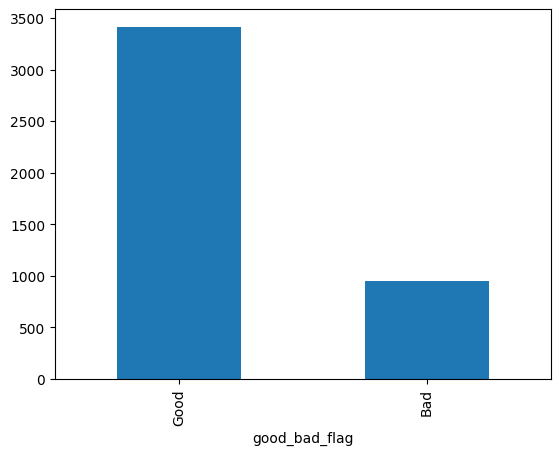

In [ ]:
#visualize target column
final_df.good_bad_flag.value_counts().plot(kind='bar')

In [ ]:
final_df['good_bad_flag'].value_counts()

,count
good_bad_flag,
Good,3416
Bad,952


In [ ]:
# convert our text into number
final_df.good_bad_flag = (final_df.good_bad_flag == 'Good').astype(int)

In [ ]:
final_df.good_bad_flag.unique()

array([1, 0])

<Axes: xlabel='good_bad_flag'>

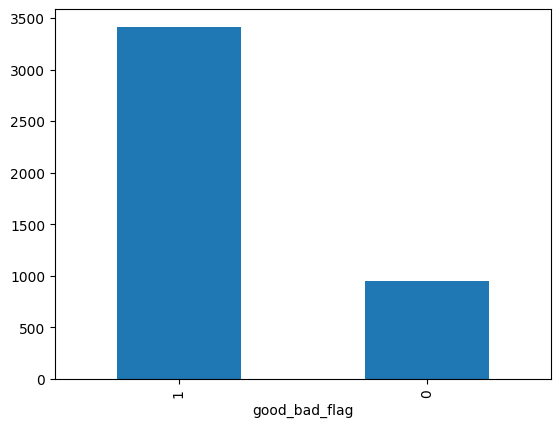

In [ ]:
# Target Column
final_df.good_bad_flag.value_counts().plot(kind='bar')

According to project instructions

0: No(Good loan)/ No Default

1: Yes(Bad Loan)/Default

so I need to interchange the number values to match instructions given

In [ ]:
#Flip the mapping to match instruction
final_df['good_bad_flag'] = final_df['good_bad_flag'].map({1: 0, 0: 1})

<Axes: xlabel='good_bad_flag'>

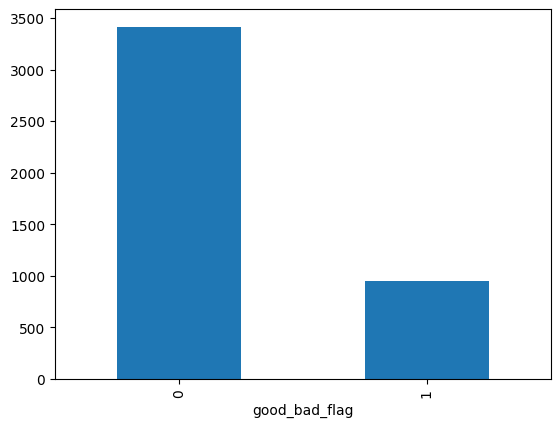

In [ ]:
#check for interchanged values
final_df.good_bad_flag.value_counts().plot(kind='bar')

- values changed, so we have 0 as good loan and 1 as bad loan

- I checked the distribution of the target variable (good_bad_flag).
- shows how many customers repaid their loans (Good) and how many defaulted (Bad).
- very important to know if the data is balanced or imbalanced before training models.
- from above visualize and value check, I found that most of the loans are Good (repaid), while only a smaller percentage are Bad (defaulted).
This means the dataset is imbalanced. I need to keep this in mind because an imbalanced dataset can affect how well themodel learns to detect loan defaults.

In [ ]:
# Split into numeric and categorical columns
num_cols = final_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = final_df.select_dtypes(include='object').columns.tolist()

In [ ]:
#check num cols
num_cols

['loanamount',
 'totaldue',
 'termdays',
 'good_bad_flag',
 'approval_time',
 'interest_rate',
 'loan_counts',
 'total_loan_amount',
 'avg_loan_amount',
 'avg_repayment_delay',
 'has_previous_loan',
 'birthdate_missing',
 'bank_account_type_missing',
 'bank_name_clients_missing',
 'employment_status_clients_missing',
 'latitude_gps_missing',
 'longitude_gps_missing',
 'age']

In [ ]:
#for cat
cat_cols

['creation_day_ofloan', 'bank_account_type', 'employment_status_clients']

In [ ]:
#remove target column from numcols before visualizing
num_cols.remove('good_bad_flag')

In [ ]:
num_cols

['loanamount',
 'totaldue',
 'termdays',
 'approval_time',
 'interest_rate',
 'loan_counts',
 'total_loan_amount',
 'avg_loan_amount',
 'avg_repayment_delay',
 'has_previous_loan',
 'birthdate_missing',
 'bank_account_type_missing',
 'bank_name_clients_missing',
 'employment_status_clients_missing',
 'latitude_gps_missing',
 'longitude_gps_missing',
 'age']

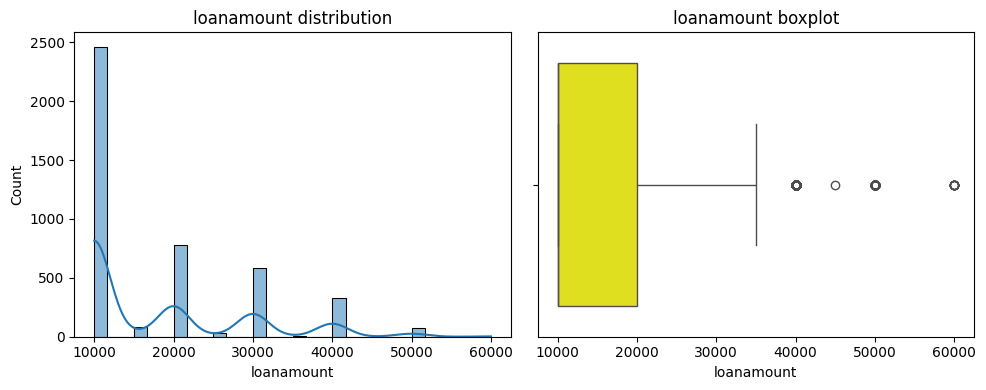

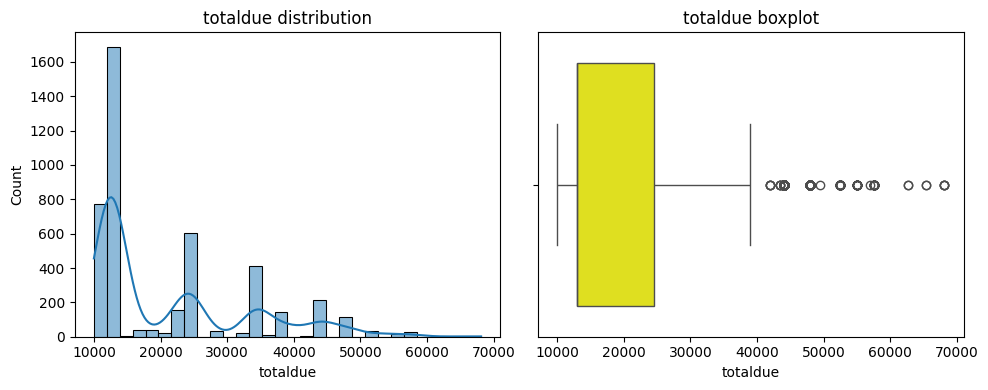

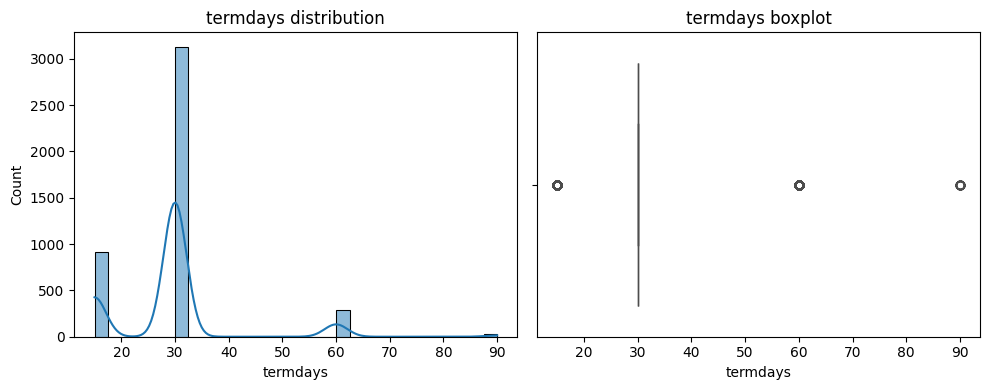

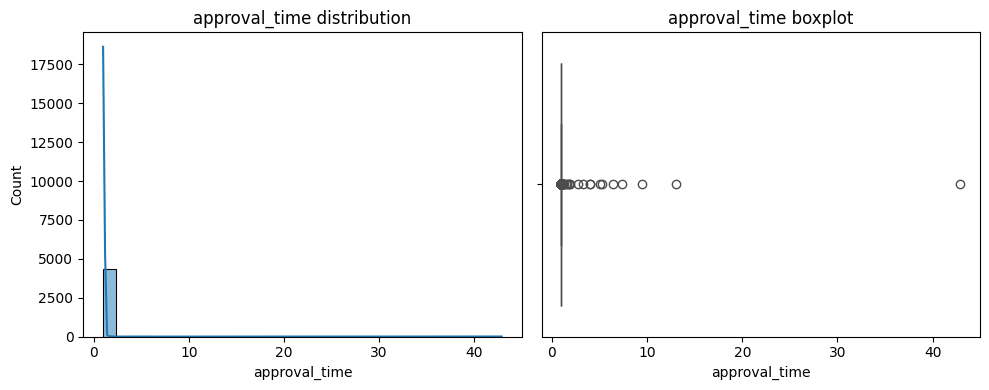

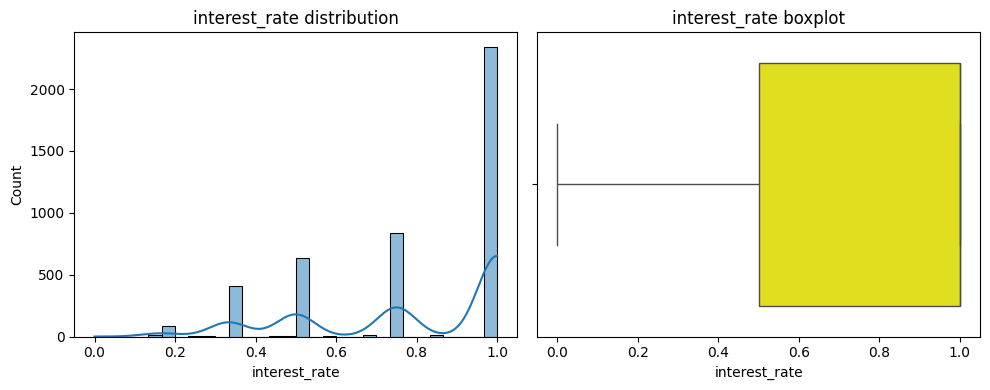

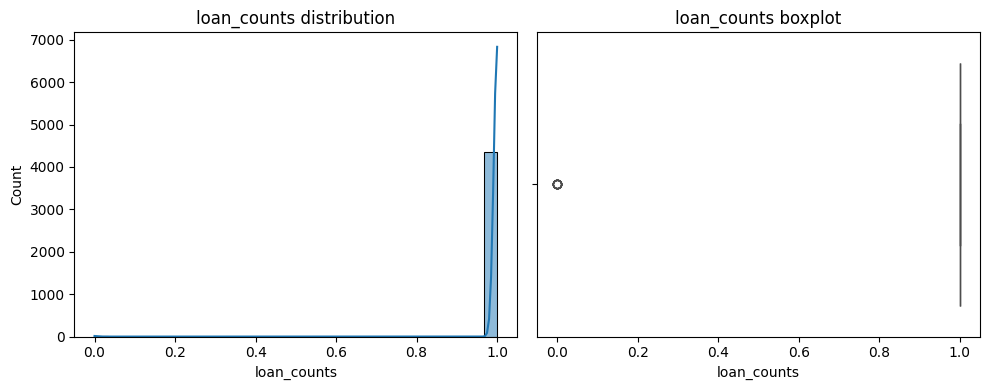

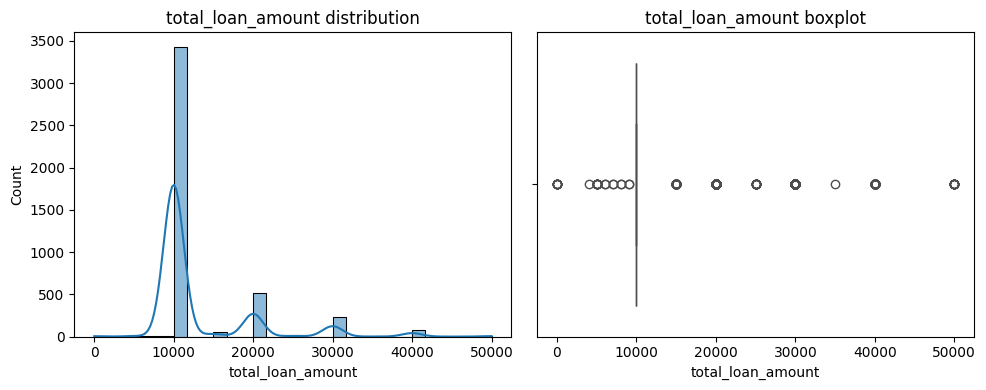

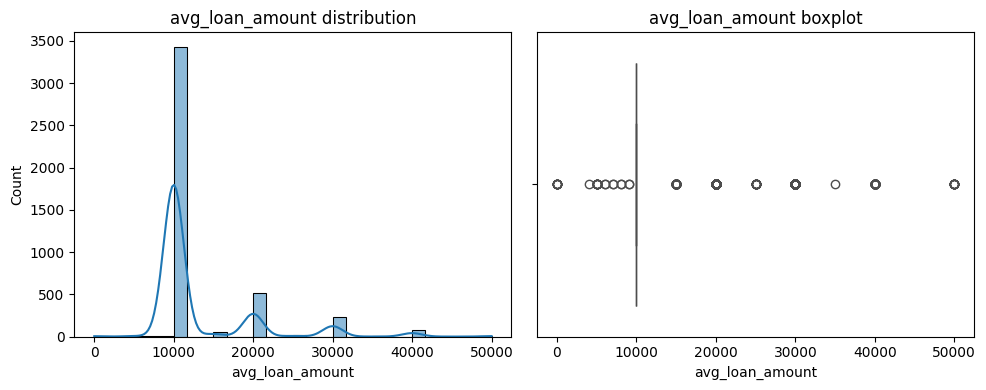

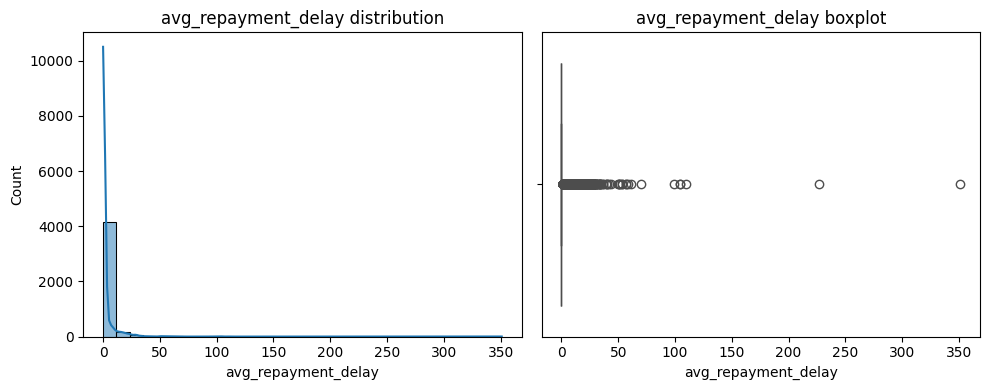

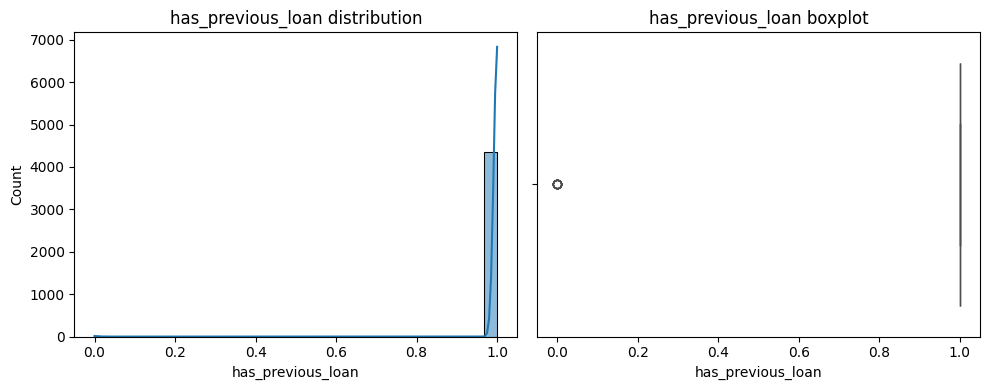

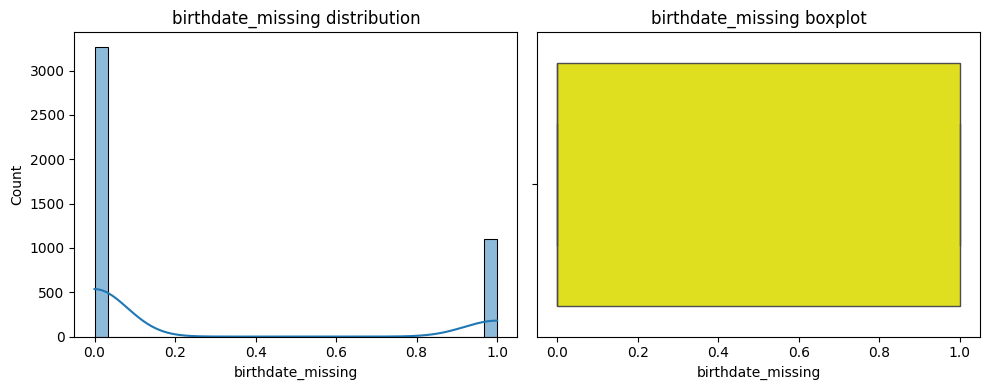

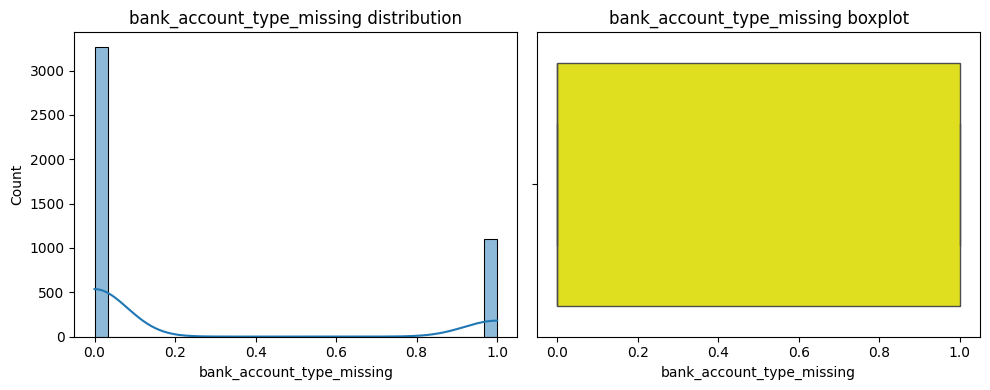

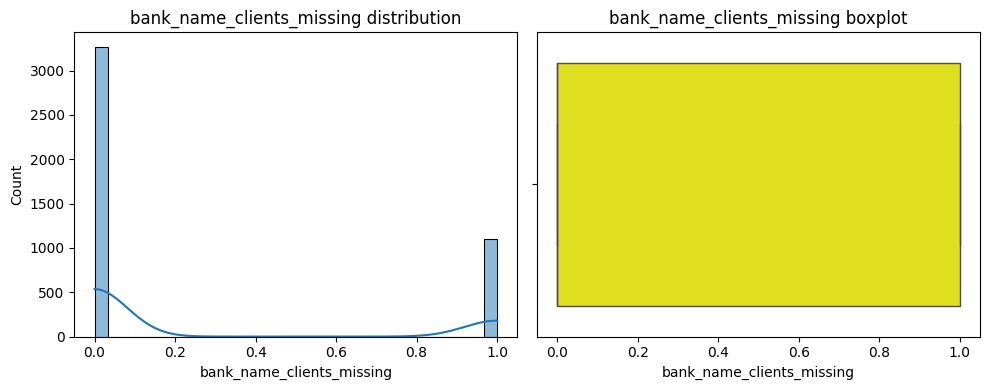

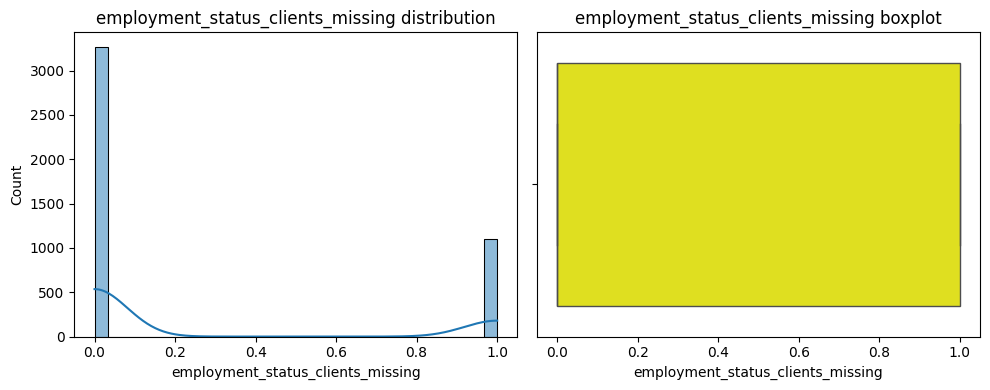

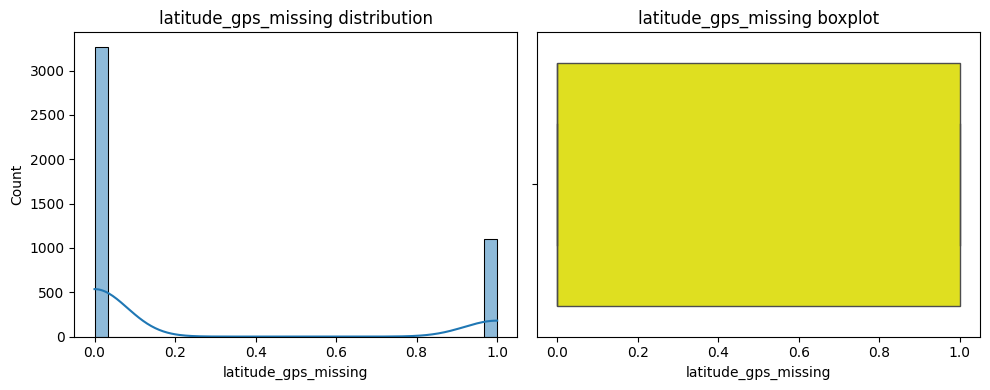

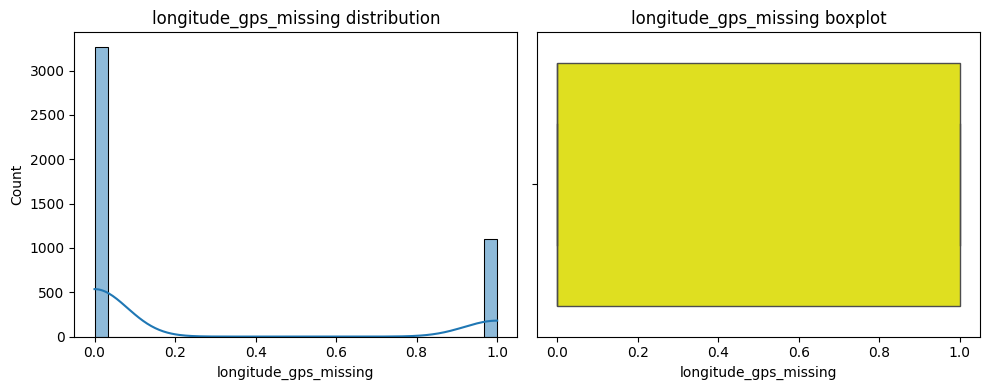

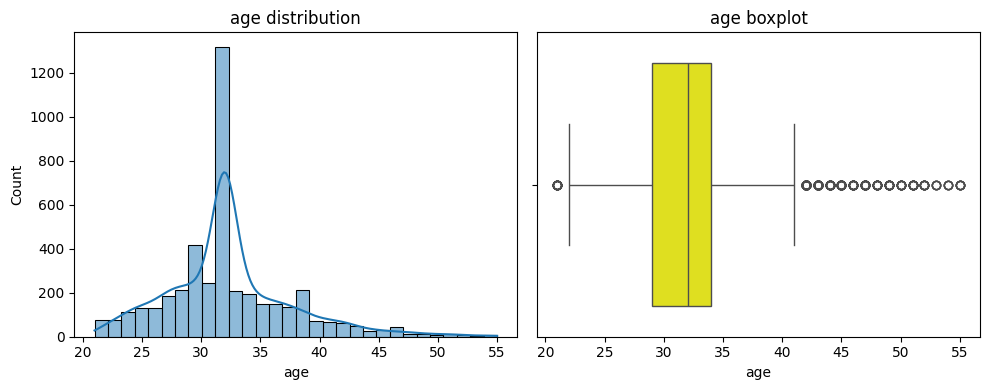

In [ ]:
# visualize the numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(final_df[col], kde=True, bins=30)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x = final_df[col], color='yellow')
    plt.title(f'{col} boxplot')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

Observations:
- Skewness
Most of the data is squashed to one side, with a long tail on the other. This is called skewness. Columns like total_loan_amount and termdays have this problem.

- Outliers
there are a few dots way out on the side of the box plots. These are outliers, or data points that are much bigger or smaller than the rest.

I will come back to treat these issues later using specific methods, such as a logarithmic transformation to fix the skewness. I may also use other techniques like:

Square root transformation

Box-Cox transformation

Capping outliers (setting a maximum value for extreme numbers)

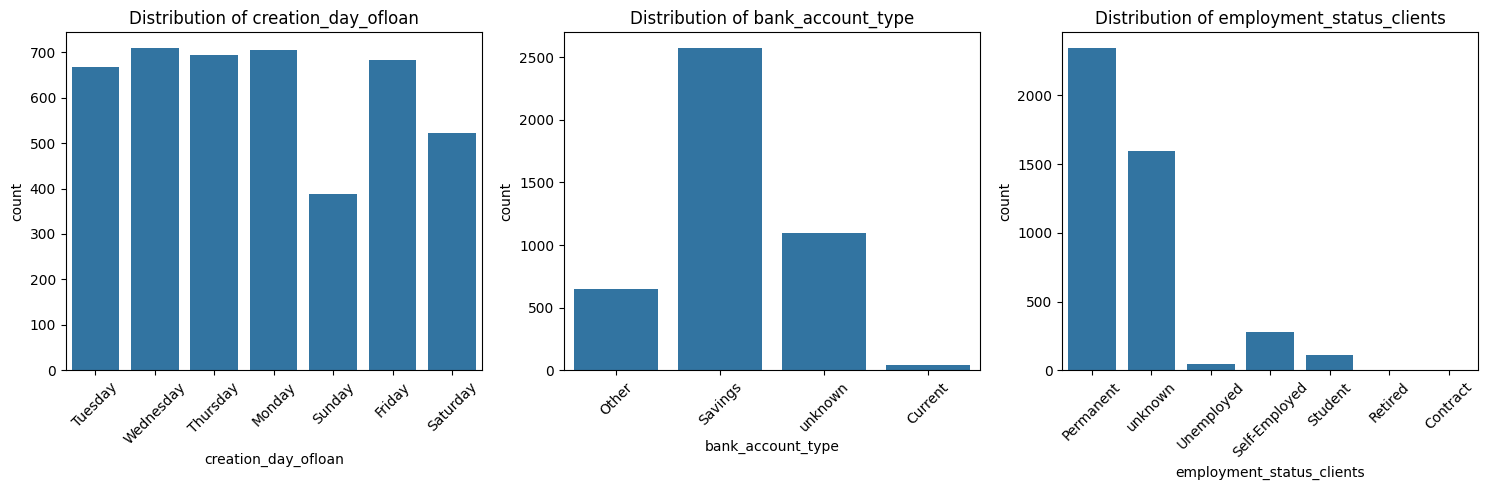

In [ ]:
# Visualizing the distribution of 3 categorical columns
fig, axes = plt.subplots(1, 3, figsize=(15,5))  # 1 row, 3 columns

for i, col in enumerate(cat_cols):
    sns.countplot(ax=axes[i], data=final_df, x=col)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

 creation_day_of_loan:

- shows the day of the week a loan was created. The distribution is relatively even, but there are slightly higher loan creation counts on Monday and Tuesday, suggesting clients often initiate loans at the start of the week.

 bank_account_type:

- contains the types of bank accounts held by clients. The vast majority of clients have a Savings account, followed by a smaller group with Current accounts. The Unknown and Other categories are minimal.

 employment_status_clients:

- shows the employment status of clients. The largest group of clients is Permanently Employed. There is a significant number of clients with an Unknown status, and smaller groups representing Self-Employed individuals and Students.



**Correlation Matrix**

In [ ]:
#add target column to number cols
num_cols.append('good_bad_flag')
num_cols

['loanamount',
 'totaldue',
 'termdays',
 'approval_time',
 'interest_rate',
 'loan_counts',
 'total_loan_amount',
 'avg_loan_amount',
 'avg_repayment_delay',
 'has_previous_loan',
 'birthdate_missing',
 'bank_account_type_missing',
 'bank_name_clients_missing',
 'employment_status_clients_missing',
 'latitude_gps_missing',
 'longitude_gps_missing',
 'age',
 'good_bad_flag']

In [ ]:
#correlation matrix
corr_matrix = final_df[num_cols].corr()

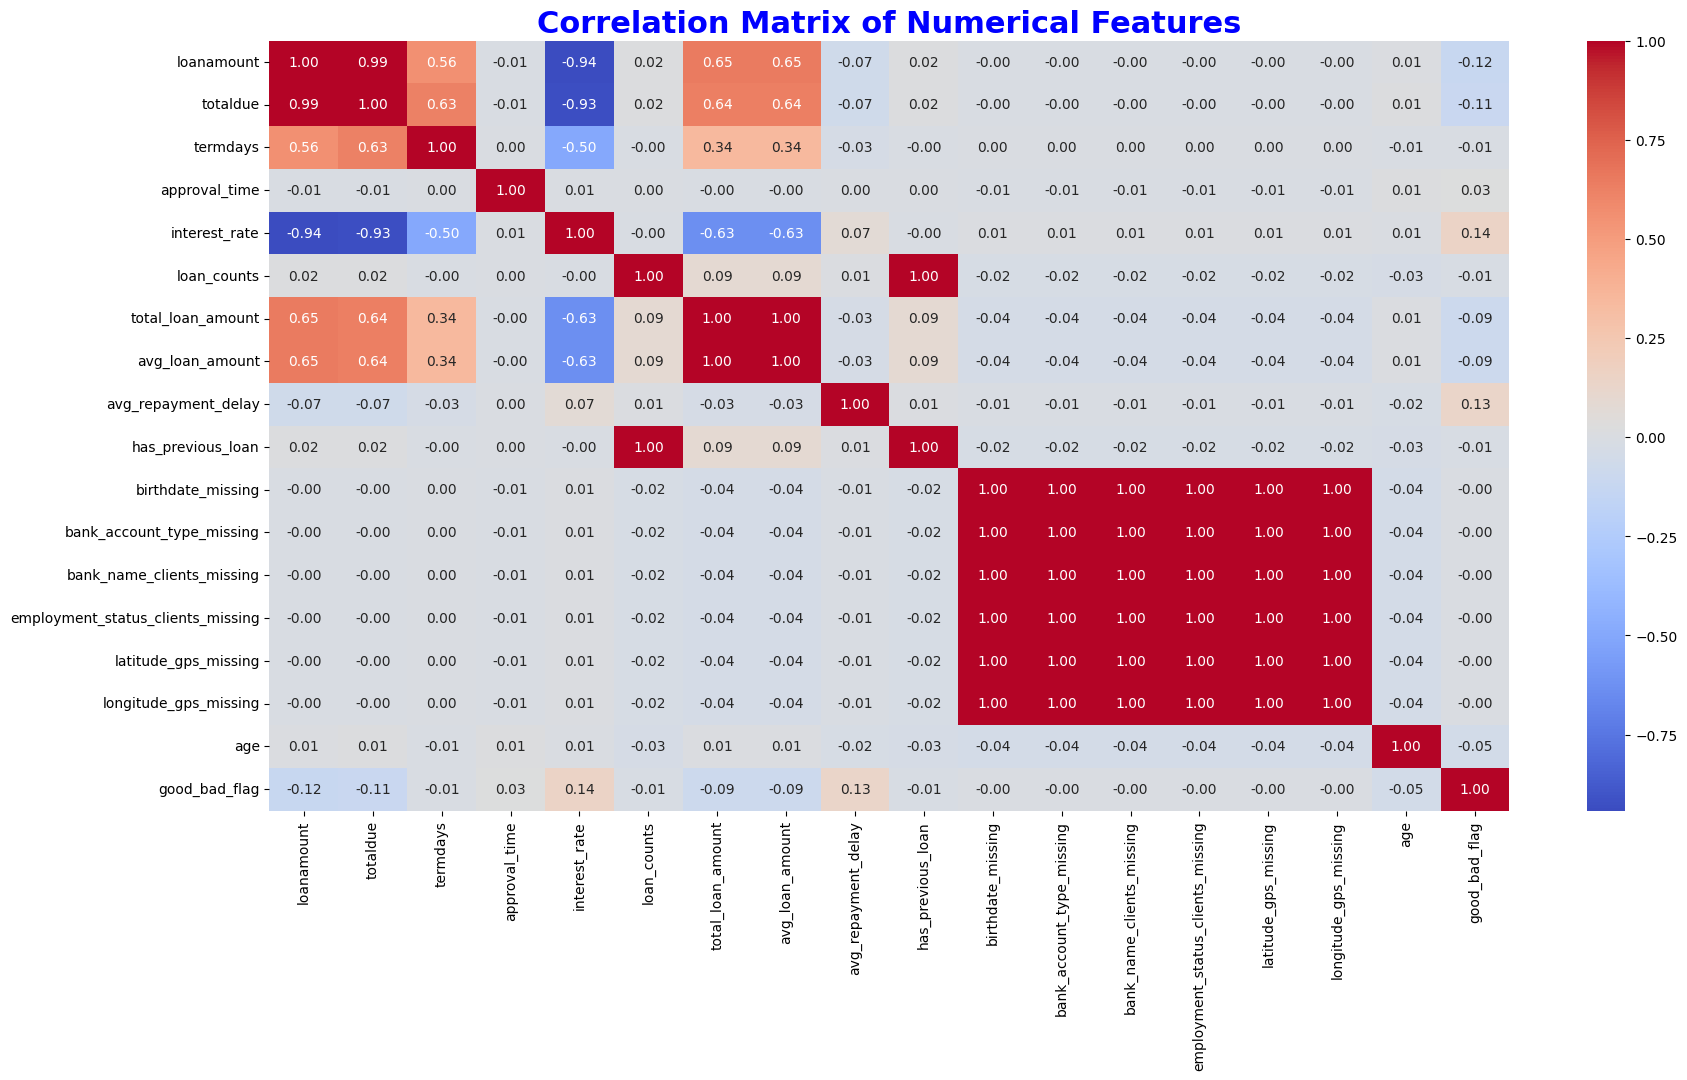

In [ ]:
#heatmap for visualizing
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontweight='bold', fontsize=22, color='b')
plt.show()

- Features such as bank_account_type_missing and bank_name_clients_missing had a correlation close to zero with our target variable (good_bad_flag). This means they provide no useful signal for our model to learn from. Dropping them helps reduce noise and simplifies the model.

In [ ]:
# Create a list of all the columns to drop
columns_to_drop = ['bank_account_type_missing','bank_name_clients_missing','employment_status_clients_missing','latitude_gps_missing','longitude_gps_missing']

# Drop the unnecessary columns from the DataFrame
final_df.drop(columns=columns_to_drop, inplace=True)



In [ ]:
#treat outliers and skewness
# List of columns to apply the log transformation to
columns_to_transform = [
    'total_loan_amount',
    'avg_loan_amount',
    'avg_repayment_delay',
    'loanamount',
    'totaldue',
    'termdays'
]

# Apply log transformation to each column in the list
for col in columns_to_transform:
#np.log1p is used because it handles zero values without error
  final_df[col] = np.log1p(final_df[col])


- I chose the log transformation because my data is highly skewed to the right.make the data more symmetrical, which helps my machine learning model learn better and make more accurate predictions.

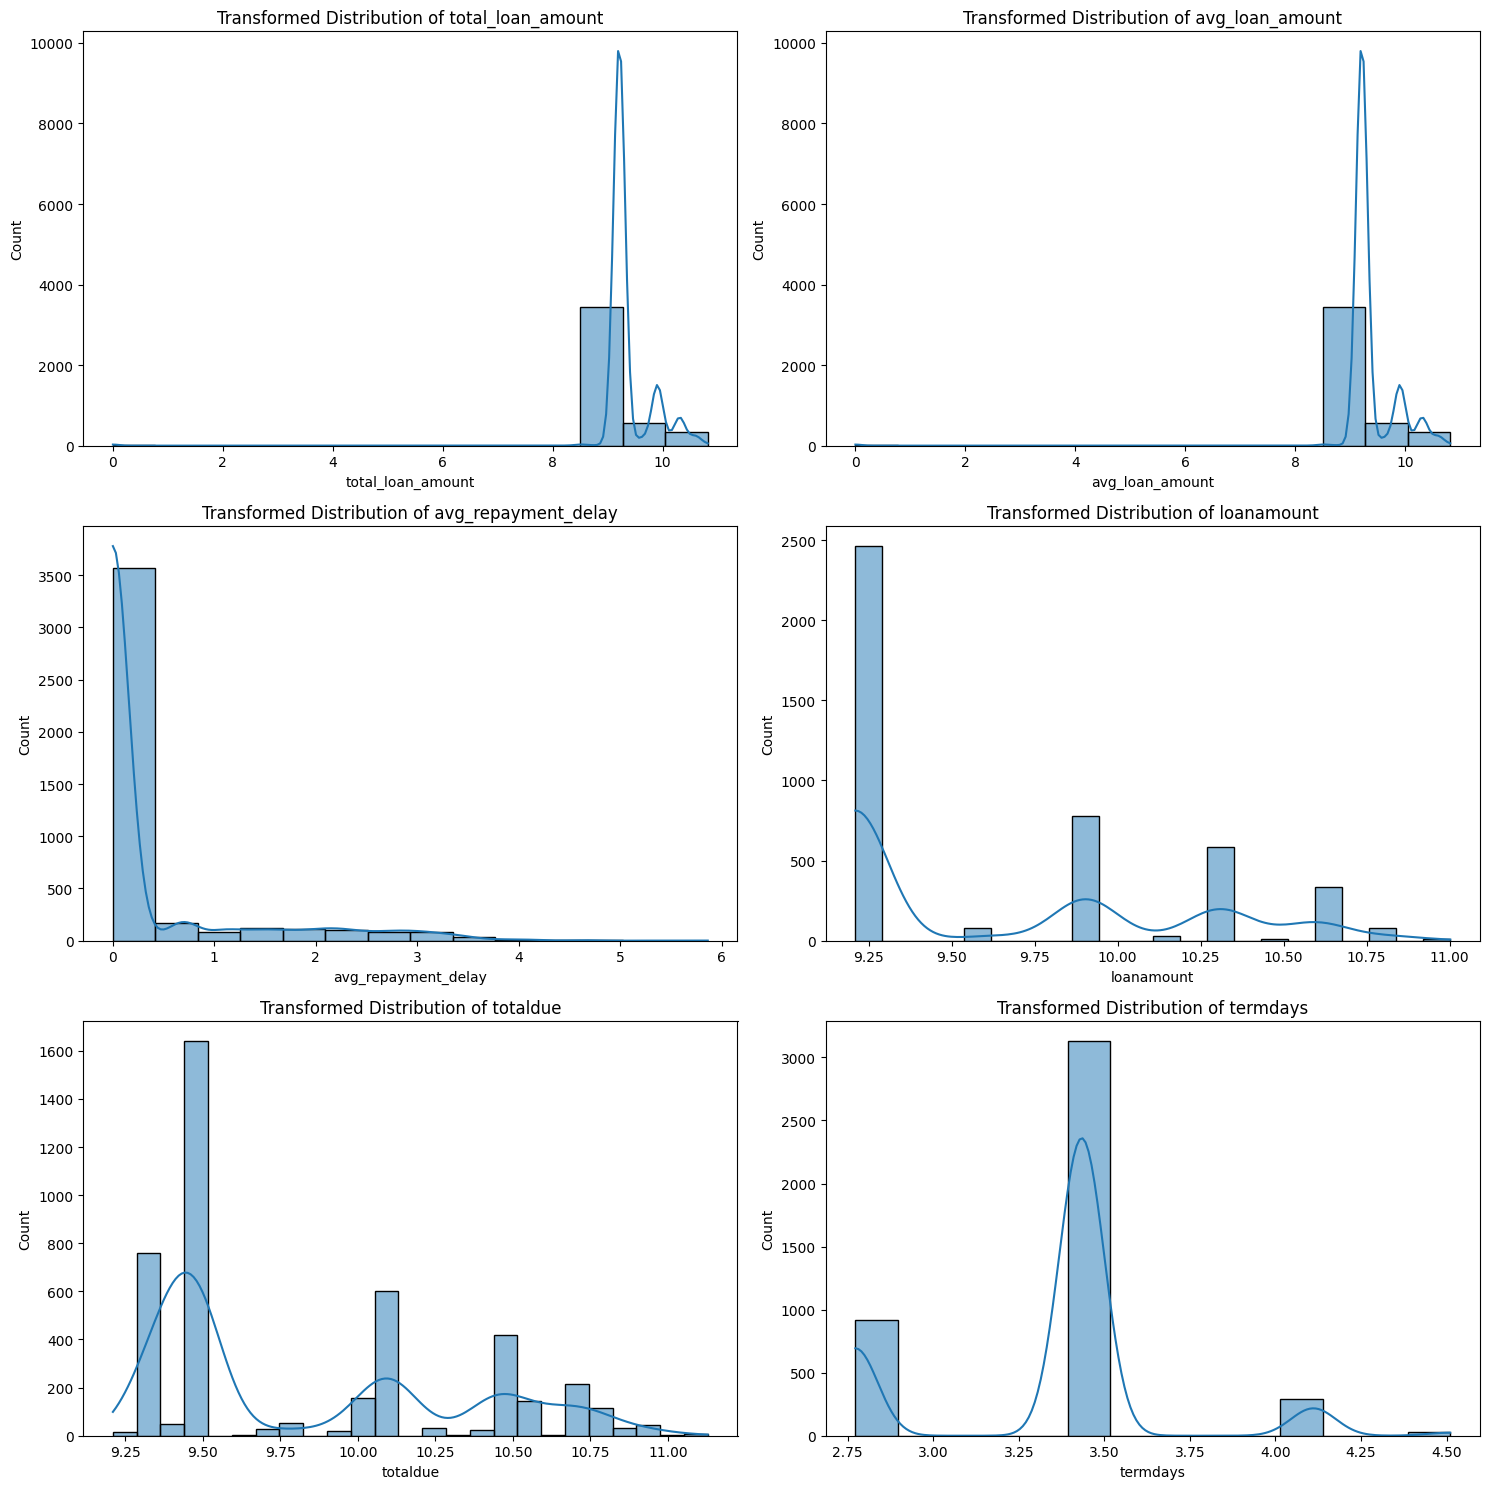

In [ ]:
#visualuze transformed columns
transformed_columns = [
    'total_loan_amount',
    'avg_loan_amount',
    'avg_repayment_delay',
    'loanamount',
    'totaldue',
    'termdays'
]

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

# Loop through the columns and plot their distributions
for i, col in enumerate(transformed_columns):
    sns.histplot(final_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Transformed Distribution of {col}')


plt.tight_layout()
plt.show()

** Data Preparation**

In [ ]:
#check final columns
final_df.columns

Index(['loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'approval_time',
       'interest_rate', 'creation_day_ofloan', 'bank_account_type',
       'employment_status_clients', 'loan_counts', 'total_loan_amount',
       'avg_loan_amount', 'avg_repayment_delay', 'has_previous_loan',
       'birthdate_missing', 'age'],
      dtype='object')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loanamount                 4368 non-null   float64
 1   totaldue                   4368 non-null   float64
 2   termdays                   4368 non-null   float64
 3   good_bad_flag              4368 non-null   int64  
 4   approval_time              4368 non-null   float64
 5   interest_rate              4368 non-null   float64
 6   creation_day_ofloan        4368 non-null   object 
 7   bank_account_type          4368 non-null   object 
 8   employment_status_clients  4368 non-null   object 
 9   loan_counts                4368 non-null   int64  
 10  total_loan_amount          4368 non-null   float64
 11  avg_loan_amount            4368 non-null   float64
 12  avg_repayment_delay        4368 non-null   float64
 13  has_previous_loan          4368 non-null   float

In [ ]:
# split the features and target
x = final_df.drop(columns='good_bad_flag')
y = final_df['good_bad_flag']

In [ ]:
from sklearn.model_selection import train_test_split
#split into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
# split into cat and num cols
num_cols = x.select_dtypes(include=np.number).columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()

In [ ]:
num_cols

['loanamount',
 'totaldue',
 'termdays',
 'approval_time',
 'interest_rate',
 'loan_counts',
 'total_loan_amount',
 'avg_loan_amount',
 'avg_repayment_delay',
 'has_previous_loan',
 'birthdate_missing',
 'age']

In [ ]:
cat_cols

['creation_day_ofloan', 'bank_account_type', 'employment_status_clients']

**Data Preprocessing**
- using a pipeline for this

In [ ]:
# COLUMN TRANSFORMER PIPELINE
# Num transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# Cat transformer
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [ ]:
# apply preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols),
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loanamount', 'totaldue', 'termdays',
                                  'approval_time', 'interest_rate',
                                  'loan_counts', 'total_loan_amount',
                                  'avg_loan_amount', 'avg_repayment_delay',
                                  'has_previous_loan', 'birthdate_missing',
                                  'age']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['creation_day_ofloan', 'bank_account_type',
                                  'employment_status_clients'])])

In [ ]:
#import libraries for model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# define our model
models = {
    'LRC' : LogisticRegression(),
    "DCT": DecisionTreeClassifier(random_state=42),
    "Random_F": RandomForestClassifier(random_state=42),
    'SVM' : SVC(),
    "GBoost": GradientBoostingClassifier(random_state=42)
}

In [ ]:
#import metric libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

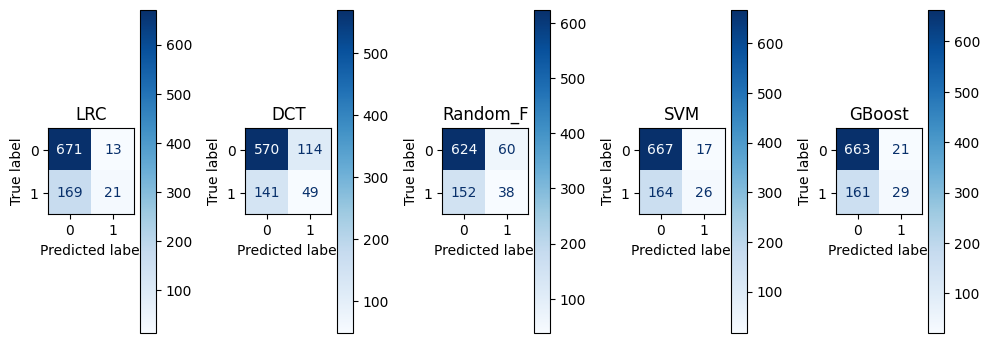

                  LRC   DCT  Random_F   SVM  GBoost
Train Accuracy   0.79  0.96      0.96  0.80    0.81
Test Accuracy    0.79  0.71      0.76  0.79    0.79
Precision Score  0.62  0.30      0.39  0.60    0.58
Recall Score     0.11  0.26      0.20  0.14    0.15
F1 Score         0.19  0.28      0.26  0.22    0.24


In [ ]:
#store result
results = {}
fig, axes = plt.subplots(1, 5, figsize=(10, 10))

for (name, model), ax in zip(models.items(), axes.flatten()):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(x_train, y_train)

    train_pred = pipeline.predict(x_train)
    test_pred = pipeline.predict(x_test)

    #metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)

    #store

    results[name] = {
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision Score": precision,
        "Recall Score": recall,
        "F1 Score": f1,
    }

    # Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()
metrics_df = pd.DataFrame(results)
print(metrics_df.round(2))

In [ ]:
metrics_df.round(2)

,LRC,DCT,Random_F,SVM,GBoost
Train Accuracy,0.79,0.96,0.96,0.80,0.81
Test Accuracy,0.79,0.71,0.76,0.79,0.79
Precision Score,0.62,0.30,0.39,0.60,0.58
Recall Score,0.11,0.26,0.20,0.14,0.15
F1 Score,0.19,0.28,0.26,0.22,0.24


Model Performance Before Addressing Class Imbalance
- From the first model results, I noticed that there was a class imbalance problem. This means there were many more Good Loan records compared to Bad Loan
because of this imbalance, the model mostly predicted the majority class Good Loan correctly, giving it high recall and accuracy.
- the model performed poorly on the minority class Bad Loan, which is actually the most important one to predict.
to fix this issue, I decided to use SMOTE (Synthetic Minority Over-sampling Technique).
- balance the dataset: It makes the number of Good Loan and Bad Loan examples more even.
- Prevent bias: It helps the model learn from both classes, especially the Bad Loan class.
- avoidd overfitting: Instead of just copying records, SMOTE creates new synthetic examples, giving the model more diverse training data

**Smote**

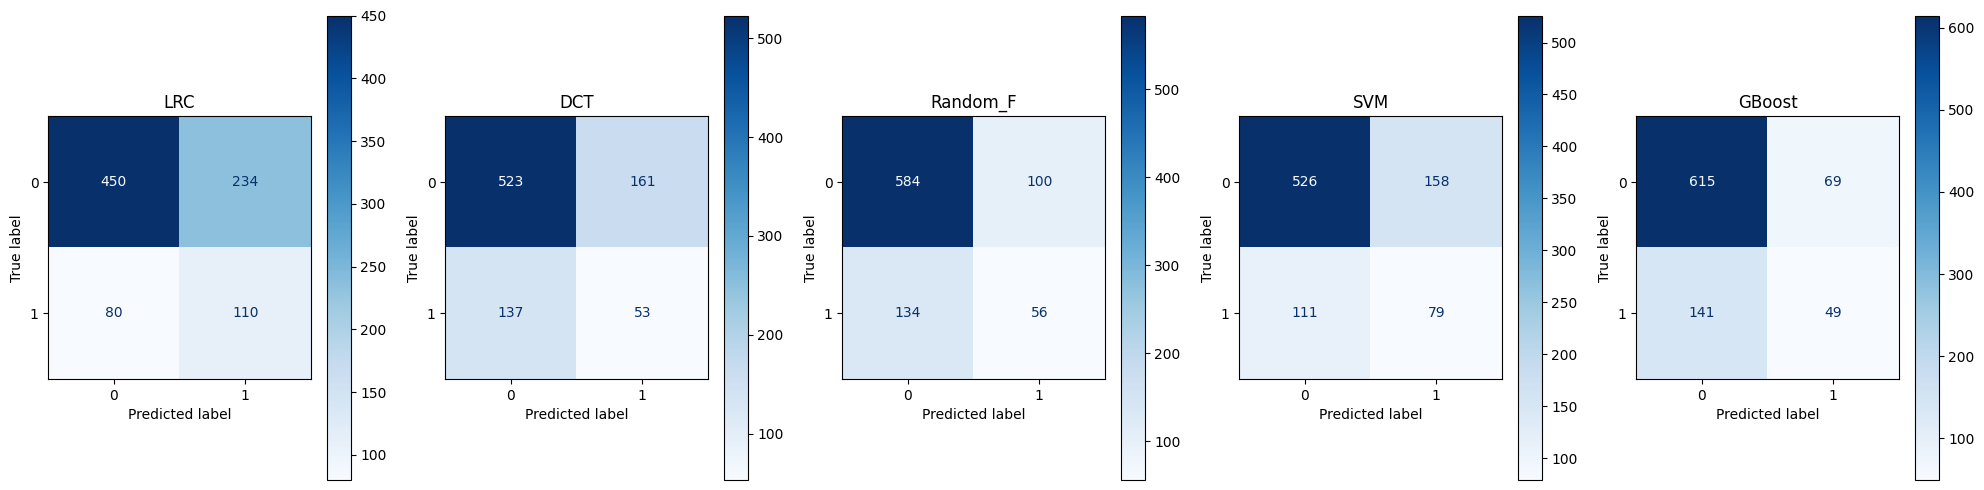

                        LRC   DCT  Random_F   SVM  GBoost
Train Accuracy         0.63  0.96      0.96  0.72    0.79
Test Accuracy          0.64  0.66      0.73  0.69    0.76
Precision (Good Loan)  0.85  0.79      0.81  0.83    0.81
Recall (Good Loan)     0.66  0.76      0.85  0.77    0.90
F1 Score (Good Loan)   0.74  0.78      0.83  0.80    0.85
Precision (Bad Loan)   0.32  0.25      0.36  0.33    0.42
Recall (Bad Loan)      0.58  0.28      0.29  0.42    0.26
F1 Score (Bad Loan)    0.41  0.26      0.32  0.37    0.32


In [ ]:
#import library from imblearn not aklearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Store results
results_smote = {}
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Loop through
for (name, model), ax in zip(models.items(), axes.flatten()):

    pipeline_smote = Pipeline(steps=[
        ('preprocessor', preprocessor), # initial preprocessor
        ('smote', SMOTE(random_state=42)), # The SMOTE step
        ('classifier', model) # initial model
    ])

    # Fit on train
    pipeline_smote.fit(x_train, y_train)

    # predict
    train_pred = pipeline_smote.predict(x_train)
    test_pred = pipeline_smote.predict(x_test)

    # evaluation metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred, average=None)
    recall = recall_score(y_test, test_pred, average=None)
    f1 = f1_score(y_test, test_pred, average=None)

    # Store metrics
    results_smote[name] = {
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision (Good Loan)": precision[0],
        "Recall (Good Loan)": recall[0],
        "F1 Score (Good Loan)": f1[0],
        "Precision (Bad Loan)": precision[1],
        "Recall (Bad Loan)": recall[1],
        "F1 Score (Bad Loan)": f1[1],
    }

    # Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# Print the results table
metrics_df_smote = pd.DataFrame(results_smote)
print(metrics_df_smote.round(2))

In [ ]:
metrics_df_smote.round(2)

,LRC,DCT,Random_F,SVM,GBoost
Train Accuracy,0.63,0.96,0.96,0.72,0.79
Test Accuracy,0.64,0.66,0.73,0.69,0.76
Precision (Good Loan),0.85,0.79,0.81,0.83,0.81
Recall (Good Loan),0.66,0.76,0.85,0.77,0.90
F1 Score (Good Loan),0.74,0.78,0.83,0.80,0.85
Precision (Bad Loan),0.32,0.25,0.36,0.33,0.42
Recall (Bad Loan),0.58,0.28,0.29,0.42,0.26
F1 Score (Bad Loan),0.41,0.26,0.32,0.37,0.32


Model after applying SMOTE

- After applying SMOTE, the models became much better at detecting Bad Loans (defaults). The Recall-0.58 and F1 Score-0.41 for Bad Loans improved significantly, which shows that the models are now correctly identifying more defaults instead of being biased toward only predicting good loans.

- overall accuracy dropped slightly, but this is expected and a good sign. It means the models are no longer taking the easy way out by always predicting the majority class (Good Loans).

- Logistic Regression model gave the best performance for our goal. It had a Recall of 0.58 and an F1 Score of 0.41 for the Bad Loan class.

- Gradient Boost model did not perform as well on the Bad Loans, with a Recall of only 0.26

- this shows that SMOTE successfully helped reduced bias towards the majority class and made the results fairer.
- Even though the results got better, the models can still be improved. To get the best performance, I will apply hyperparameter tuning, which means I will try different parameter settings for the models and pick the one that works best.


**Hyperparameter Tuning**
- these are settings that control how a model learns.
- in Gradient Boosting:
- n_estimators: how many trees the model builds
- max_depth: how deep each tree is
- learning_rate: how fast the model learns
- if we leave these at their default values, the model might not give the best results.

- to improve performance, I used GridSearchCV, which tries different combinations of these hyperparameters and selects the best set.
- Logistice Regression: regularization strength
- I will tune two models:
- Logistic Regression (which is my main model)
- Gradient boost (which I'm using as a comparison)
- I used F1-score as my metric because the dataset is imbalanced (more “Good” loans than “Bad” loans).
- The F1-score balances precision and recall, which is better than just looking at accuracy

In [ ]:
# Models and parameters to tune
models_and_params = [
    {
        'name': 'Gradient Boost',
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__max_depth': [3, 5]
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(random_state=42),
        'params': {
            'classifier__C': [0.1, 1.0]
        }
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV
results = []

for item in models_and_params:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', item['model'])
    ])

    #Gridsearch
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=item['params'],
        cv=3,
        scoring='f1',
        n_jobs=-1
    )

    grid.fit(x_train, y_train)

    #save best result
    results.append({
        'Model': item['name'],
        'Best F1 Score': grid.best_score_,
        'Best Parameters': grid.best_params_,
        'Best Estimator': grid.best_estimator_
    })

#results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Best F1 Score,Best Parameters,Best Estimator
0,Gradient Boost,0.375039,"{'classifier__learning_rate': 0.1, 'classifier...","(ColumnTransformer(transformers=[('num',\n ..."
1,Logistic Regression,0.398091,{'classifier__C': 0.1},"(ColumnTransformer(transformers=[('num',\n ..."


- After balancing my data with SMOTE and fine-tuning my models, I got these results. I looked at the F1 Score because my main goal is to find "bad loans" and this score is the best way to do that.
- It shows that Logistic Regression slightly outperformed Gradient Boosting on F1. LR(0.398) and GB(0.375)
- this showed me that tuning can really change which model performs better, and that even a simple model like Logistic Regression can become better when improved.
- but the models are still struggling with the minority class (Bad Loan). The F1-scores for Bad Loans are lower compared to Good Loans

- Logistic Regression model had a higher F1 Score of 0.398. This means it did a better job of balancing how many "bad loans" it found with how many of its predictions were correct.

The Gradient Boost model's F1 Score was a bit lower at 0.375.

Based on this, my Logistic Regression model is my best performer so far. I will continue to work on improving it.

In [ ]:
#results list contains the best_estimator for each tuned model
tuned_results = []

for result in results:
    #get best trained pipeline from the GridSearch result
    best_pipeline = result['Best Estimator']

    #predict on the test set
    y_pred = best_pipeline.predict(x_test)

    #lassification report
    report = classification_report(y_test, y_pred, output_dict=True)

    #store the results
    tuned_results.append({
        'Model': result['Model'],
        'Test Accuracy': report['accuracy'],
        'Precision (Good Loan)': report['0']['precision'],
        'Recall (Good Loan)': report['0']['recall'],
        'F1 Score (Good Loan)': report['0']['f1-score'],
        'Precision (Bad Loan)': report['1']['precision'],
        'Recall (Bad Loan)': report['1']['recall'],
        'F1 Score (Bad Loan)': report['1']['f1-score'],
    })

#to a dataframe
tuned_results_df = pd.DataFrame(tuned_results)
print('Final Tuned Model Performance')
print(tuned_results_df.round(2))

Final Tuned Model Performance
                 Model  Test Accuracy  Precision (Good Loan)  \
0       Gradient Boost           0.76                   0.82   
1  Logistic Regression           0.65                   0.85   

   Recall (Good Loan)  F1 Score (Good Loan)  Precision (Bad Loan)  \
0                0.89                  0.85                  0.43   
1                0.67                  0.75                  0.33   

   Recall (Bad Loan)  F1 Score (Bad Loan)  
0               0.29                 0.35  
1               0.57                 0.42  


- evaluation of my models after applying SMOTE and basic tuning.
- Logistic Regression model had a higher F1 Score for the Bad Loan class, which is good because the F1 Score balances how many "bad loans" it found with how many of its predictions were correct.
- the Recall for the Bad Loan class for both models was very low. This tells me that my models were not very good at finding the actual bad loans, which is the most important part of my project.
- the esults showed that my models needed more information to make better predictions.
- I will create new features my model can learn better from and reapply all process from data preparation.

In [ ]:
#creating new features to help model learn new patterns from dataset
#Payment Ratio: Proportion of loan paid back
final_df['payment_ratio'] = final_df['totaldue'] / final_df['loanamount']

#repayment Speed: How fast a loan was repaid
final_df['repayment_speed'] = final_df['termdays'] / final_df['avg_repayment_delay']

#Age-to-Loan Ratio:
final_df['age_to_loan_ratio'] = final_df['age'] / final_df['loanamount']


In [ ]:

#new featurbe created
new_features = ['payment_ratio', 'repayment_speed', 'age_to_loan_ratio']

#replace infinity values with NaN
final_df[new_features] = final_df[new_features].replace([np.inf, -np.inf], np.nan)

# Filling missing values in these columns with the median of each column
final_df[new_features] = final_df[new_features].fillna(final_df[new_features].median())

- I came back up to o do this because I encounter an error of infinity
When I created new features, like repayment_speed = final_df['termdays'] / final_df['avg_repayment_delay'], I might have divided by zero. This created infinityvalues in the data. the model pipeline,(the StandardScaler), cannot handle these inf values, which caused the error I saw. This code finds and removes those bad values, replaces with NaN and later fill with nan



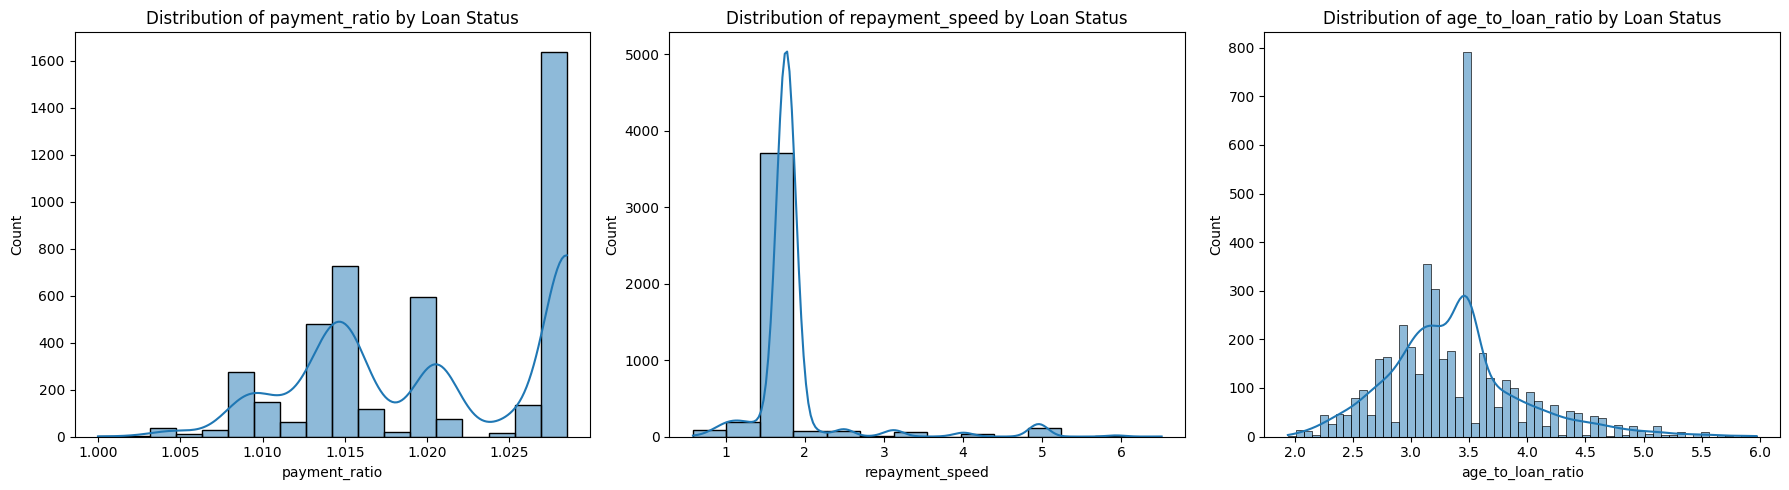

In [ ]:
#visualize new features
new_features = ['payment_ratio', 'repayment_speed', 'age_to_loan_ratio']

fig, axes = plt.subplots(1, len(new_features), figsize=(18, 5))

for i, col in enumerate(new_features):
    sns.histplot(data=final_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Loan Status')

plt.tight_layout()
plt.show()

In [ ]:
#log transformation om new features
final_df['payment_ratio'] = np.log1p(final_df['payment_ratio'])
final_df['repayment_speed'] = np.log1p(final_df['repayment_speed'])
final_df['age_to_loan_ratio'] = np.log1p(final_df['age_to_loan_ratio'])

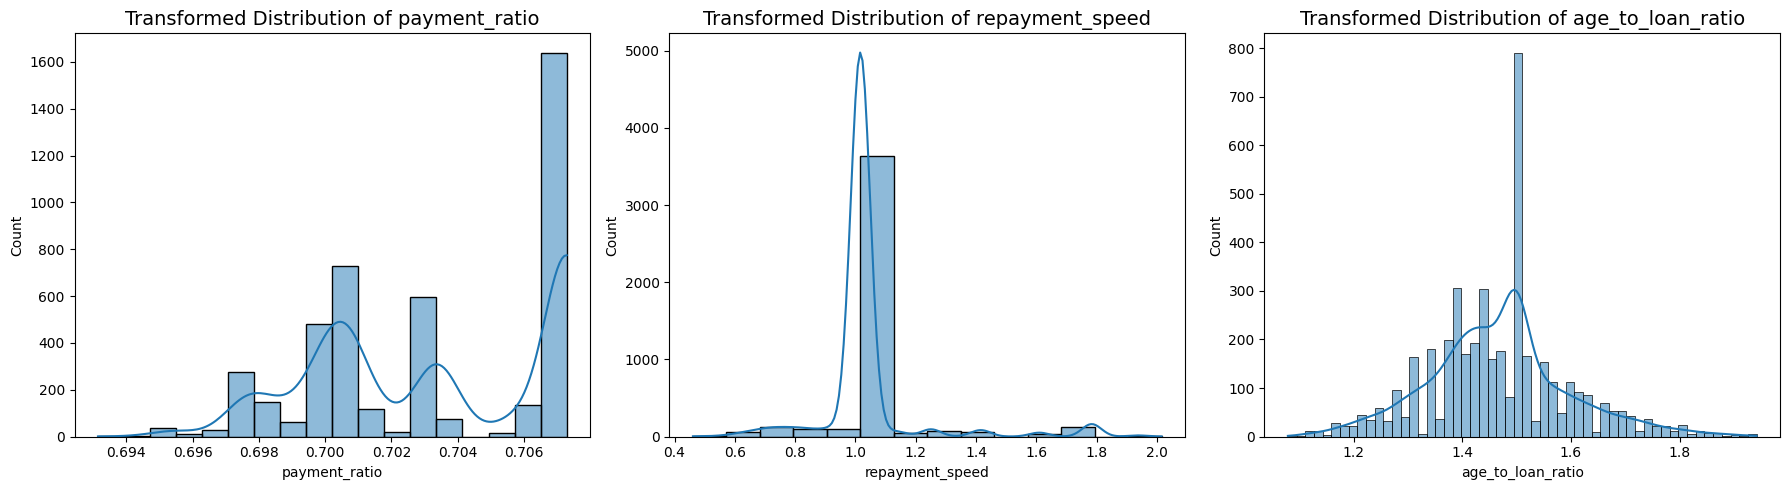

In [ ]:
#visualize transformed features
features_trans = ['payment_ratio', 'repayment_speed', 'age_to_loan_ratio']

fig, axes = plt.subplots(1, len(features_trans), figsize=(18, 5))

for i, col in enumerate(features_trans):
    sns.histplot(data=final_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Transformed Distribution of {col}', fontsize=14)

plt.tight_layout()
plt.show()

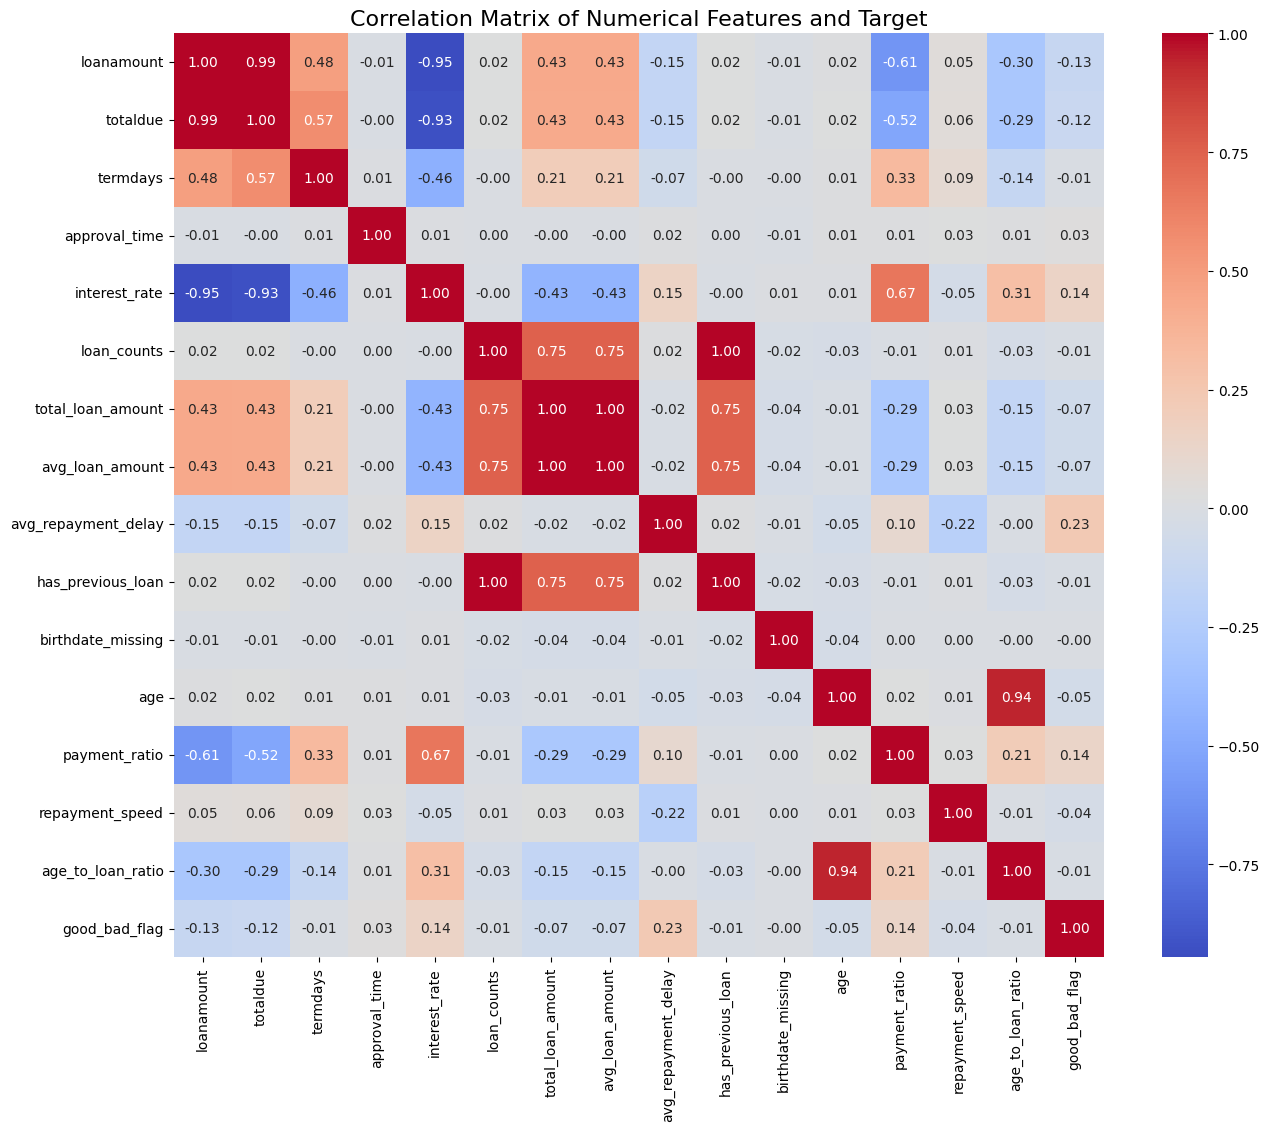

In [ ]:
#correlation matrix
num_f = [
    'loanamount',
    'totaldue',
    'termdays',
    'approval_time',
    'interest_rate',
    'loan_counts',
    'total_loan_amount',
    'avg_loan_amount',
    'avg_repayment_delay',
    'has_previous_loan',
    'birthdate_missing',
    'age',
    'payment_ratio',
    'repayment_speed',
    'age_to_loan_ratio',
    'good_bad_flag'
]


df_num = final_df[num_f]

corr_matrix = df_num.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features and Target', fontsize=16)
plt.show()

Some features are too correlated which is multiculinarity and dropping highly correlated features is one way to treat it

In [ ]:
#drop columns too correlated
final_df = final_df.drop(columns=['total_loan_amount','has_previous_loan', 'avg_loan_amount'])

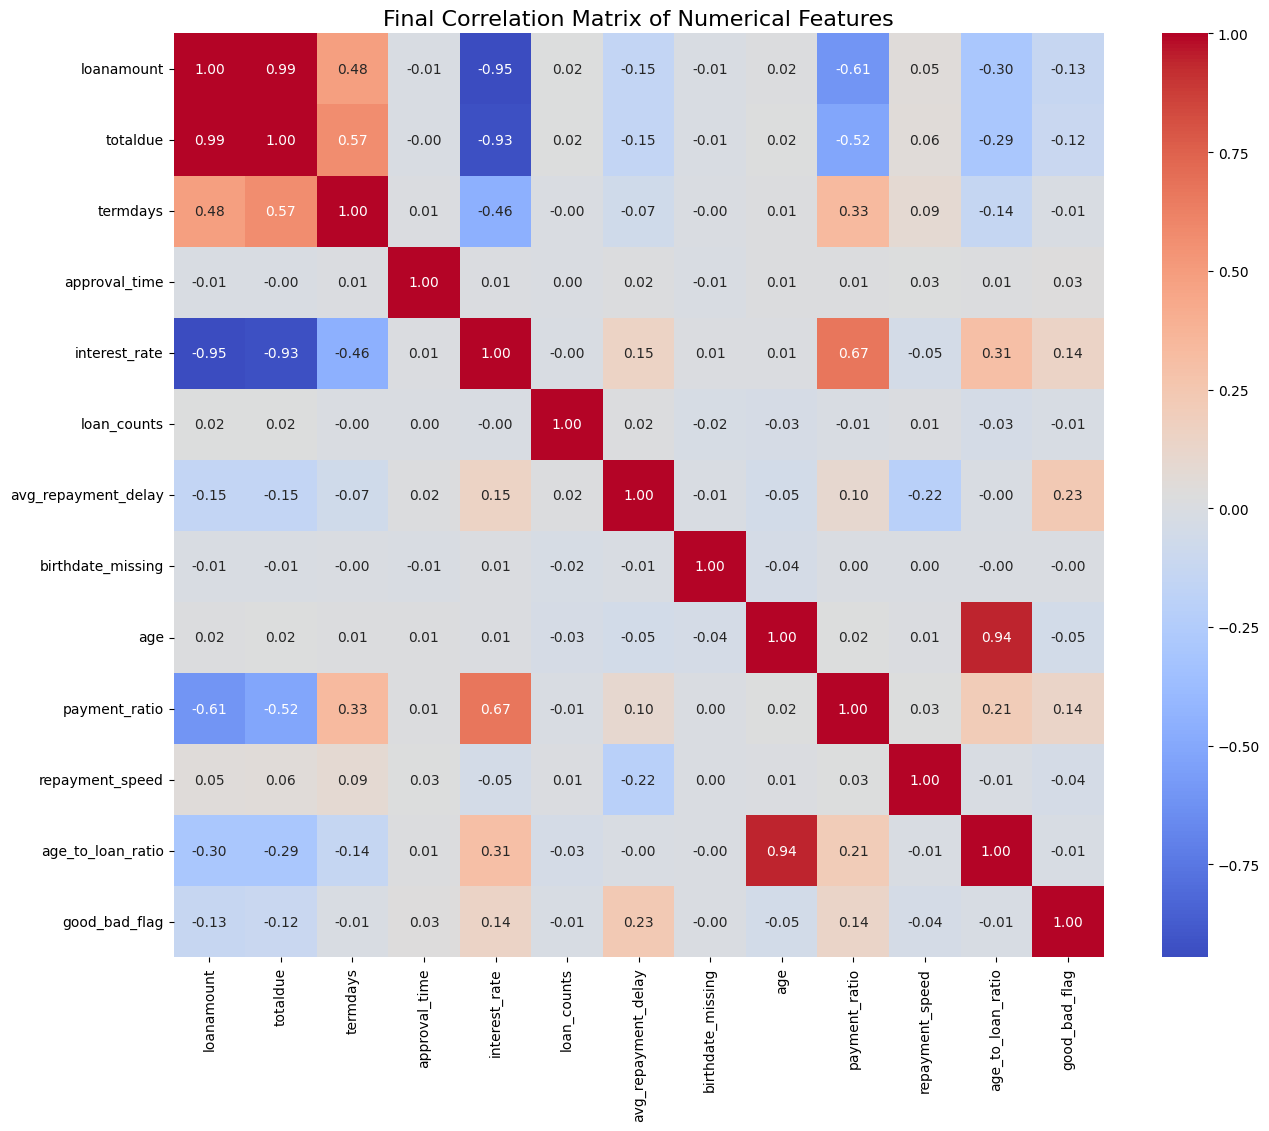

In [ ]:
#visualize correlation matrix to check
nums_tf= [
    'loanamount',
    'totaldue',
    'termdays',
    'approval_time',
    'interest_rate',
    'loan_counts',
    'avg_repayment_delay',
    'birthdate_missing',
    'age',
    'payment_ratio',
    'repayment_speed',
    'age_to_loan_ratio',
    'good_bad_flag'
]

df_c = final_df[nums_tf]

#the final correlation matrix
corr_matrix_final = df_c.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix_final, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Final Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [ ]:
# split the features and target
x = final_df.drop(columns='good_bad_flag')
y = final_df['good_bad_flag']

In [ ]:
from sklearn.model_selection import train_test_split
#split into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
# split into cat and num cols
num_cols = x.select_dtypes(include=np.number).columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()

In [ ]:
# COLUMN TRANSFORMER PIPELINE
# Num transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# Cat transformer
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [ ]:
# apply preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols),
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loanamount', 'totaldue', 'termdays',
                                  'approval_time', 'interest_rate',
                                  'loan_counts', 'avg_repayment_delay',
                                  'birthdate_missing', 'age', 'payment_ratio',
                                  'repayment_speed', 'age_to_loan_ratio']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['creation_day_ofloan', 'bank_account_type',
                                  'employment_status_clients'])])

In [ ]:
# define our model
models = {
    'LRC' : LogisticRegression(),
    "DCT": DecisionTreeClassifier(random_state=42),
    "Random_F": RandomForestClassifier(random_state=42),
    'SVM' : SVC(),
    "GBoost": GradientBoostingClassifier(random_state=42)
}

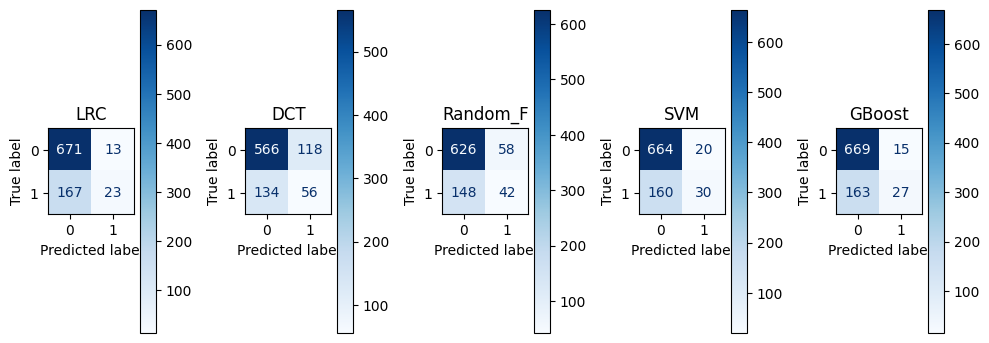

                  LRC   DCT  Random_F   SVM  GBoost
Train Accuracy   0.79  0.96      0.96  0.80    0.82
Test Accuracy    0.79  0.71      0.76  0.79    0.80
Precision Score  0.64  0.32      0.42  0.60    0.64
Recall Score     0.12  0.29      0.22  0.16    0.14
F1 Score         0.20  0.31      0.29  0.25    0.23


In [ ]:
#store result
results = {}
fig, axes = plt.subplots(1, 5, figsize=(10, 10))

for (name, model), ax in zip(models.items(), axes.flatten()):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(x_train, y_train)

    train_pred = pipeline.predict(x_train)
    test_pred = pipeline.predict(x_test)

    #metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)

    #results

    results[name] = {
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision Score": precision,
        "Recall Score": recall,
        "F1 Score": f1,
    }

    # Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()
metrics_df = pd.DataFrame(results)
print(metrics_df.round(2))

In [ ]:
metrics_df.round(2)

,LRC,DCT,Random_F,SVM,GBoost
Train Accuracy,0.79,0.96,0.96,0.80,0.82
Test Accuracy,0.79,0.71,0.76,0.79,0.80
Precision Score,0.64,0.32,0.42,0.60,0.64
Recall Score,0.12,0.29,0.22,0.16,0.14
F1 Score,0.20,0.31,0.29,0.25,0.23


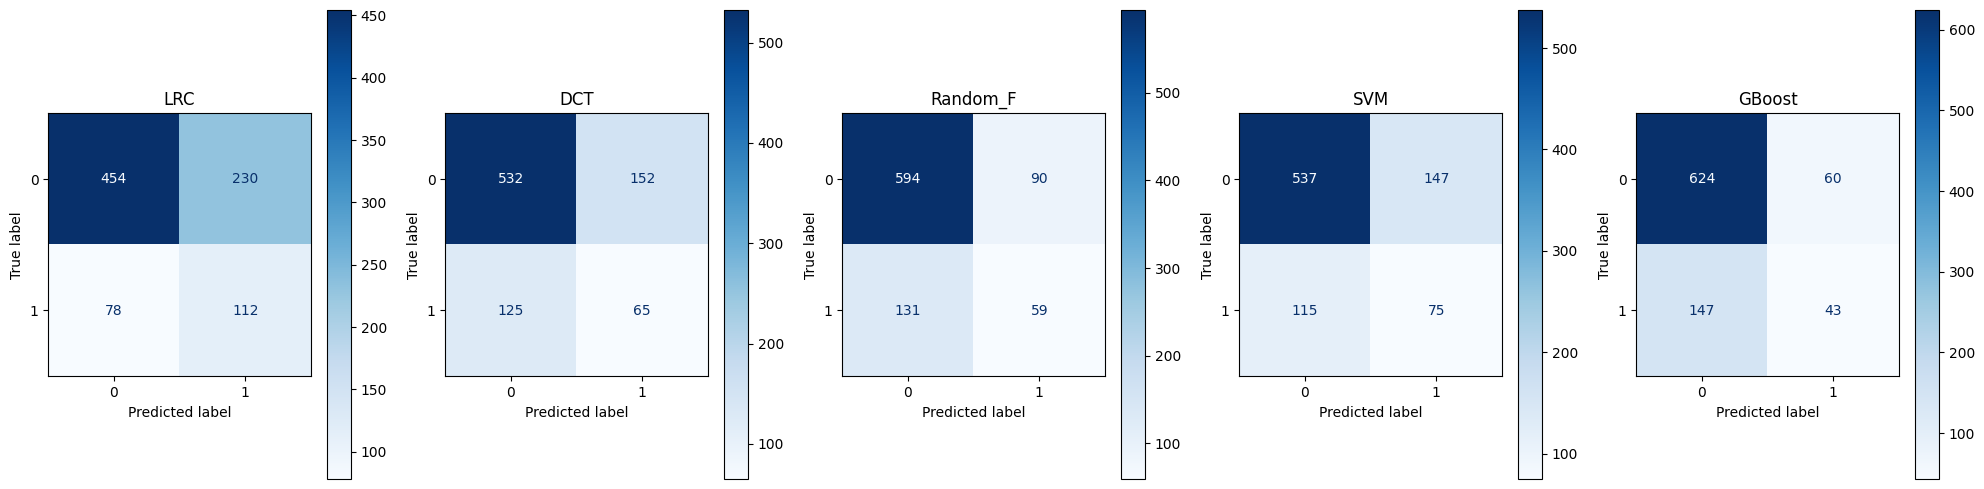

                        LRC   DCT  Random_F   SVM  GBoost
Train Accuracy         0.63  0.96      0.96  0.73    0.80
Test Accuracy          0.65  0.68      0.75  0.70    0.76
Precision (Good Loan)  0.85  0.81      0.82  0.82    0.81
Recall (Good Loan)     0.66  0.78      0.87  0.79    0.91
F1 Score (Good Loan)   0.75  0.79      0.84  0.80    0.86
Precision (Bad Loan)   0.33  0.30      0.40  0.34    0.42
Recall (Bad Loan)      0.59  0.34      0.31  0.39    0.23
F1 Score (Bad Loan)    0.42  0.32      0.35  0.36    0.29


In [ ]:
#import library from imblearn not aklearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Store results
results_smote = {}
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Loop through
for (name, model), ax in zip(models.items(), axes.flatten()):

    pipeline_smote = Pipeline(steps=[
        ('preprocessor', preprocessor), # initial preprocessor
        ('smote', SMOTE(random_state=42)), # The SMOTE step
        ('classifier', model) # initial model
    ])

    # Fit on train
    pipeline_smote.fit(x_train, y_train)

    # predict
    train_pred = pipeline_smote.predict(x_train)
    test_pred = pipeline_smote.predict(x_test)

    # evaluation metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred, average=None)
    recall = recall_score(y_test, test_pred, average=None)
    f1 = f1_score(y_test, test_pred, average=None)

    # Store metrics
    results_smote[name] = {
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision (Good Loan)": precision[0],
        "Recall (Good Loan)": recall[0],
        "F1 Score (Good Loan)": f1[0],
        "Precision (Bad Loan)": precision[1],
        "Recall (Bad Loan)": recall[1],
        "F1 Score (Bad Loan)": f1[1],
    }

    # Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# Print the results table
metrics_df_smote = pd.DataFrame(results_smote)
print(metrics_df_smote.round(2))

In [ ]:
metrics_df_smote.round(2)

,LRC,DCT,Random_F,SVM,GBoost
Train Accuracy,0.63,0.96,0.96,0.73,0.80
Test Accuracy,0.65,0.68,0.75,0.70,0.76
Precision (Good Loan),0.85,0.81,0.82,0.82,0.81
Recall (Good Loan),0.66,0.78,0.87,0.79,0.91
F1 Score (Good Loan),0.75,0.79,0.84,0.80,0.86
Precision (Bad Loan),0.33,0.30,0.40,0.34,0.42
Recall (Bad Loan),0.59,0.34,0.31,0.39,0.23
F1 Score (Bad Loan),0.42,0.32,0.35,0.36,0.29


In [ ]:
# Models and parameters to tune
models_and_params = [
    {
        'name': 'Gradient Boost',
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__max_depth': [3, 5]
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(random_state=42),
        'params': {
            'classifier__C': [0.1, 1.0]
        }
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV
results = []

for item in models_and_params:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', item['model'])
    ])

    #Gridsearch
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=item['params'],
        cv=3,
        scoring='f1',
        n_jobs=-1
    )

    grid.fit(x_train, y_train)

    #save best result
    results.append({
        'Model': item['name'],
        'Best F1 Score': grid.best_score_,
        'Best Parameters': grid.best_params_,
        'Best Estimator': grid.best_estimator_
    })

#results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Best F1 Score,Best Parameters,Best Estimator
0,Gradient Boost,0.380990,"{'classifier__learning_rate': 0.05, 'classifie...","(ColumnTransformer(transformers=[('num',\n ..."
1,Logistic Regression,0.398916,{'classifier__C': 1.0},"(ColumnTransformer(transformers=[('num',\n ..."


In [ ]:
results_df

,Model,Best F1 Score,Best Parameters,Best Estimator
0,Gradient Boost,0.380990,"{'classifier__learning_rate': 0.05, 'classifie...","(ColumnTransformer(transformers=[('num',\n ..."
1,Logistic Regression,0.398916,{'classifier__C': 1.0},"(ColumnTransformer(transformers=[('num',\n ..."


In [ ]:
#results list contains the best_estimator for each tuned model
tuned_results = []

for result in results:
    #get best trained pipeline from the GridSearch result
    best_pipeline = result['Best Estimator']

    #predict on the test set
    y_pred = best_pipeline.predict(x_test)

    #lassification report
    report = classification_report(y_test, y_pred, output_dict=True)

    #store the results
    tuned_results.append({
        'Model': result['Model'],
        'Test Accuracy': report['accuracy'],
        'Precision (Good Loan)': report['0']['precision'],
        'Recall (Good Loan)': report['0']['recall'],
        'F1 Score (Good Loan)': report['0']['f1-score'],
        'Precision (Bad Loan)': report['1']['precision'],
        'Recall (Bad Loan)': report['1']['recall'],
        'F1 Score (Bad Loan)': report['1']['f1-score'],
    })

#to a dataframe
tuned_results_df = pd.DataFrame(tuned_results)
print('Final Tuned Model Performance')
print(tuned_results_df.round(2))

Final Tuned Model Performance
                 Model  Test Accuracy  Precision (Good Loan)  \
0       Gradient Boost           0.75                   0.81   
1  Logistic Regression           0.65                   0.85   

   Recall (Good Loan)  F1 Score (Good Loan)  Precision (Bad Loan)  \
0                0.88                  0.85                  0.39   
1                0.66                  0.75                  0.33   

   Recall (Bad Loan)  F1 Score (Bad Loan)  
0               0.27                 0.32  
1               0.59                 0.42  


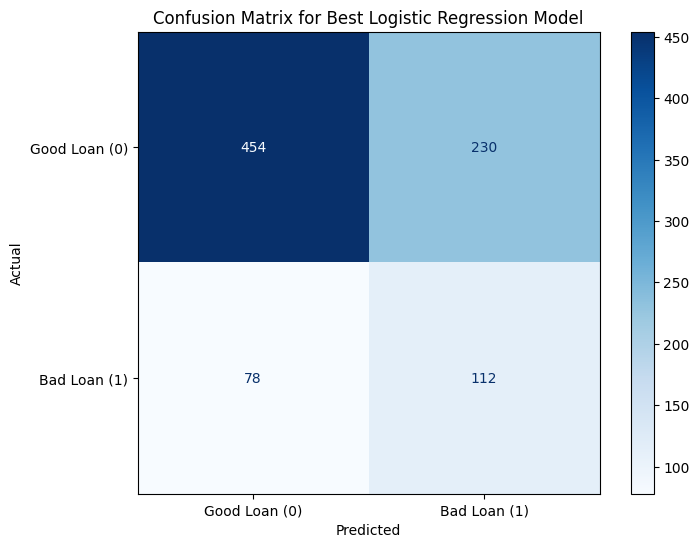

In [ ]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good Loan (0)', 'Bad Loan (1)'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix for Best Logistic Regression Model')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

- after smote and hyparameter tuning, creating new features.
- I evaluated my models again to see if it has improved.
- Logistic Regression model had a Recall of 0.59 and an F1 Score of 0.42 for Badd Loans. This means it successfully identified 59% of all the bad loans, which is a huge improvement from my initial results.

- Gradient Boost model had a higher overall Test Accuracy (0.75), but it was not as good at finding bad loans. Its Recall was only 0.27, meaning it missed most of the bad loans which is objective of project(defaulted)

- despite my Logistic Regression model is the better model, I am aiming for a 60-65% recall to make the model even more valuable. I believe that some of the extreme data points, or outliers, might be hurting my model's performance.

- to improve my model
performance , I will use the Interquartile Range (IQR) method to remove these outliers. This is another effective way to clean my data and hopefully improve my final results.

*IQR**
- I also tried using the Interquartile Range (IQR) method to remove outliers in the dataset.
- However, after applying IQR, the model performance actually became much worse. The precision, recall, and F1-score for the Bad Loan class dropped close to zero, meaning the model could no longer identify defaults properly.
- This showed me that those “outliers” were actually important information for the model.
- Because of this, I decided not to use IQR outlier removal in my final modeling process



**Final Insights & Conclusion**

**Summary of ways I approached the problem**
- I cleaned and merged three datasets, created features (loan counts, average loan amount, average repayment delay, age, etc.), and fixed missing values.  
- I found the dataset was imbalanced (many more non-defaults than defaults). To fix that I used **SMOTE** on training data.  
- I compared several models, performed hyperparameter tuning with GridSearchCV and focused on **F1-score** because the dataset is imbalanced.

**Final results**
- After SMOTE and tuning, **Logistic Regression** had the best balance for detecting defaults:
  - **Recall (Default / Bad Loan)** = **59%** (the model catches ~59% of actual defaults)  
  - **F1 (Default)** = **42%**  
  - **Test accuracy** ≈ **65%**  

- **Gradient Boosting** also performed well overall but had lower recall on defaults (F1 ≈ 0.32).

**What I learned**
- Improving recall for defaults often reduces overall accuracy or causes more false alarms (good customers flagged as risky). For a lender, catching defaults is usually more important, so prioritizing recall is justified.  
- I tried outlier removal (IQR) but it made performance worse, so I left it out of the final pipeline. That shows some extreme values were informative rather than noise.

**Limitations and improvements**
- I worked entirely on my phone, which made it harder to explore the data in depth and limited the types of analysis and visualization I could attempt. With a laptop, I could have engineered more features and explored the data more thoroughly.  
- Feature engineering: add more predictive features
- Try other imbalance strategies (class weights, SMOTE variations) and advanced models (XGBoost / LightGBM) when i practice more and know how to use them better
- With more or richer data, the model should improve further.

**Final note**
- This project has been a valuable beginner experience for me. I learned how to clean and prepare data, handle class imbalance, and compare different models while seeing how simple models like Logistic Regression can still perform strongly when used carefully. The results are not perfect, but that reflects the real world challenges of working with financial data.
- Most importantly, I now understand the trade-offs between accuracy and recall, and why in lending, it can be more important to catch risky loans even if it means some false alarms.
- This project gave me a strong foundation to build on, and I look forward to improving with more practice, richer data, and advanced techniques in future.

**Power BI Visulaization**
- After building and testing my machine learning models in Python, I used Power BI to create simple visuals that make the results easier to understand. These visuals show the overall loan distribution and highlight patterns of defaults versus non-defaults in the dataset.

- Insights from the Power BI Dashboard:

  Most customers repay their loans successfully – about 81% of loans are good loans (no default), while 19% are bad loans (default).

	Defaulted loans are still a risk – even though they are fewer, they make up a significant amount of the total money borrowed (₦15M out of ₦78M).
  
	Customer profile plays a role – loan defaults appear across groups, but younger borrowers show slightly higher default rates compared to older ones.

  Business value – these insights can help a bank focus more on high-risk groups while still supporting reliable customers